In [186]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import time
sns.set()

In [187]:
lr = 0.01
df = 0.99
epsilon = 0.05
n_episods = 100

env = gym.make('Taxi-v3')
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [188]:
class Taxi3():
    """
    df: discount factor, default: 0.99
    lr: learning rate, default: 0.01
    initial_e: the initial probability of exploration, default: 1
    n_episodes: total number of episodes
    time_steps: the maximum number of time steps at each episodes
    """
    def __init__(self, df= 0.99, lr=0.3, initial_e=1, min_e=0.01, decay_e=0.9, n_episodes=None):
        self.df = df
        self.lr = lr
        self.initial_e = initial_e
        self.epsilon = initial_e
        self.min_e = min_e
        self.decay_e = decay_e
        self.n_episodes = n_episodes
        self.ts = []
        self.env = gym.make('Taxi-v3')
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        
        
    def train(self):
        for eps in range(self.n_episodes):
            self.epsilon = self.initial_e
            s = self.env.reset()
            a = self.env.action_space.sample()
#             print('episode:', e)
#             clear_output(wait=True)
            for t in range(self.env.spec.max_episode_steps):
#                 clear_output(wait=True)
#                 self.env.render()
                s_, r, done, __ = self.env.step(a)
                a_ = np.argmax(self.Q[s_, :])
                if self.epsilon > self.min_e:
                    self.epsilon *= self.decay_e
                if np.random.random() < self.epsilon:
                    a_ = self.env.action_space.sample()
                self.Q[s, a] += self.lr * (r + self.df * self.Q[s_, a_] - self.Q[s, a])
                a = a_
                s = s_
#                 self.reward.append(r)
                if done:
                    self.ts.append(t)
                    print(f'Episode {eps} finished after {t} time steps')
                    break
        
    def test(self):
        s = self.env.reset()
        a = self.env.action_space.sample()
        for t_ in range(self.env.spec.max_episode_steps):
            clear_output(wait=True)
            s_, r, done, __ = self.env.step(a)
            self.env.render()
            a_ = np.argmax(self.Q[s_, :])
            a = a_
            s = s_
            time.sleep(0.8)
            if done:
                break
        print(f'Finished in {t_} time steps')
                
    def reset_Q(self):
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))

    def plot_timesteps(self):
        l = []
        s = 0
        for i, p in enumerate(self.ts):
            s += p
            l.append(s/(i+1))
        plt.figure(figsize=(16, 8))
        plt.plot(self.ts, color='#42f5ef')
        plt.plot(l, 'r--', linewidth=3)
        plt.xlabel('Episode')
        plt.ylabel('Time steps')
        plt.xlim(0, len(self.ts))
        plt.ylim(0, 200)
        

In [189]:
t = Taxi3(n_episodes=30000)


In [190]:
t.train()

Episode 0 finished after 199 time steps
Episode 1 finished after 199 time steps
Episode 2 finished after 199 time steps
Episode 3 finished after 199 time steps
Episode 4 finished after 199 time steps
Episode 5 finished after 199 time steps
Episode 6 finished after 199 time steps
Episode 7 finished after 199 time steps
Episode 8 finished after 199 time steps
Episode 9 finished after 199 time steps
Episode 10 finished after 199 time steps
Episode 11 finished after 199 time steps
Episode 12 finished after 199 time steps
Episode 13 finished after 199 time steps
Episode 14 finished after 199 time steps
Episode 15 finished after 199 time steps
Episode 16 finished after 199 time steps
Episode 17 finished after 199 time steps
Episode 18 finished after 199 time steps
Episode 19 finished after 199 time steps
Episode 20 finished after 165 time steps
Episode 21 finished after 128 time steps
Episode 22 finished after 199 time steps
Episode 23 finished after 199 time steps
Episode 24 finished after 

Episode 241 finished after 123 time steps
Episode 242 finished after 38 time steps
Episode 243 finished after 110 time steps
Episode 244 finished after 86 time steps
Episode 245 finished after 34 time steps
Episode 246 finished after 31 time steps
Episode 247 finished after 73 time steps
Episode 248 finished after 21 time steps
Episode 249 finished after 81 time steps
Episode 250 finished after 129 time steps
Episode 251 finished after 101 time steps
Episode 252 finished after 10 time steps
Episode 253 finished after 16 time steps
Episode 254 finished after 36 time steps
Episode 255 finished after 29 time steps
Episode 256 finished after 199 time steps
Episode 257 finished after 151 time steps
Episode 258 finished after 28 time steps
Episode 259 finished after 76 time steps
Episode 260 finished after 189 time steps
Episode 261 finished after 47 time steps
Episode 262 finished after 76 time steps
Episode 263 finished after 10 time steps
Episode 264 finished after 100 time steps
Episode 

Episode 494 finished after 174 time steps
Episode 495 finished after 39 time steps
Episode 496 finished after 42 time steps
Episode 497 finished after 42 time steps
Episode 498 finished after 43 time steps
Episode 499 finished after 67 time steps
Episode 500 finished after 35 time steps
Episode 501 finished after 26 time steps
Episode 502 finished after 56 time steps
Episode 503 finished after 19 time steps
Episode 504 finished after 19 time steps
Episode 505 finished after 14 time steps
Episode 506 finished after 28 time steps
Episode 507 finished after 29 time steps
Episode 508 finished after 17 time steps
Episode 509 finished after 21 time steps
Episode 510 finished after 32 time steps
Episode 511 finished after 64 time steps
Episode 512 finished after 14 time steps
Episode 513 finished after 20 time steps
Episode 514 finished after 19 time steps
Episode 515 finished after 12 time steps
Episode 516 finished after 21 time steps
Episode 517 finished after 30 time steps
Episode 518 fin

Episode 820 finished after 23 time steps
Episode 821 finished after 25 time steps
Episode 822 finished after 69 time steps
Episode 823 finished after 27 time steps
Episode 824 finished after 24 time steps
Episode 825 finished after 32 time steps
Episode 826 finished after 29 time steps
Episode 827 finished after 18 time steps
Episode 828 finished after 59 time steps
Episode 829 finished after 23 time steps
Episode 830 finished after 49 time steps
Episode 831 finished after 23 time steps
Episode 832 finished after 181 time steps
Episode 833 finished after 25 time steps
Episode 834 finished after 28 time steps
Episode 835 finished after 67 time steps
Episode 836 finished after 14 time steps
Episode 837 finished after 24 time steps
Episode 838 finished after 58 time steps
Episode 839 finished after 18 time steps
Episode 840 finished after 29 time steps
Episode 841 finished after 20 time steps
Episode 842 finished after 20 time steps
Episode 843 finished after 16 time steps
Episode 844 fin

Episode 1123 finished after 35 time steps
Episode 1124 finished after 12 time steps
Episode 1125 finished after 24 time steps
Episode 1126 finished after 20 time steps
Episode 1127 finished after 24 time steps
Episode 1128 finished after 35 time steps
Episode 1129 finished after 24 time steps
Episode 1130 finished after 22 time steps
Episode 1131 finished after 17 time steps
Episode 1132 finished after 28 time steps
Episode 1133 finished after 23 time steps
Episode 1134 finished after 19 time steps
Episode 1135 finished after 14 time steps
Episode 1136 finished after 21 time steps
Episode 1137 finished after 18 time steps
Episode 1138 finished after 108 time steps
Episode 1139 finished after 47 time steps
Episode 1140 finished after 13 time steps
Episode 1141 finished after 18 time steps
Episode 1142 finished after 17 time steps
Episode 1143 finished after 20 time steps
Episode 1144 finished after 19 time steps
Episode 1145 finished after 26 time steps
Episode 1146 finished after 47 ti

Episode 1328 finished after 90 time steps
Episode 1329 finished after 24 time steps
Episode 1330 finished after 23 time steps
Episode 1331 finished after 18 time steps
Episode 1332 finished after 27 time steps
Episode 1333 finished after 24 time steps
Episode 1334 finished after 23 time steps
Episode 1335 finished after 20 time steps
Episode 1336 finished after 39 time steps
Episode 1337 finished after 29 time steps
Episode 1338 finished after 24 time steps
Episode 1339 finished after 14 time steps
Episode 1340 finished after 26 time steps
Episode 1341 finished after 21 time steps
Episode 1342 finished after 17 time steps
Episode 1343 finished after 25 time steps
Episode 1344 finished after 24 time steps
Episode 1345 finished after 16 time steps
Episode 1346 finished after 22 time steps
Episode 1347 finished after 21 time steps
Episode 1348 finished after 28 time steps
Episode 1349 finished after 32 time steps
Episode 1350 finished after 36 time steps
Episode 1351 finished after 44 tim

Episode 1674 finished after 57 time steps
Episode 1675 finished after 28 time steps
Episode 1676 finished after 14 time steps
Episode 1677 finished after 21 time steps
Episode 1678 finished after 24 time steps
Episode 1679 finished after 25 time steps
Episode 1680 finished after 26 time steps
Episode 1681 finished after 24 time steps
Episode 1682 finished after 24 time steps
Episode 1683 finished after 18 time steps
Episode 1684 finished after 71 time steps
Episode 1685 finished after 20 time steps
Episode 1686 finished after 18 time steps
Episode 1687 finished after 20 time steps
Episode 1688 finished after 27 time steps
Episode 1689 finished after 21 time steps
Episode 1690 finished after 33 time steps
Episode 1691 finished after 27 time steps
Episode 1692 finished after 24 time steps
Episode 1693 finished after 20 time steps
Episode 1694 finished after 22 time steps
Episode 1695 finished after 26 time steps
Episode 1696 finished after 32 time steps
Episode 1697 finished after 15 tim

Episode 1882 finished after 22 time steps
Episode 1883 finished after 23 time steps
Episode 1884 finished after 22 time steps
Episode 1885 finished after 33 time steps
Episode 1886 finished after 25 time steps
Episode 1887 finished after 19 time steps
Episode 1888 finished after 25 time steps
Episode 1889 finished after 23 time steps
Episode 1890 finished after 19 time steps
Episode 1891 finished after 23 time steps
Episode 1892 finished after 68 time steps
Episode 1893 finished after 20 time steps
Episode 1894 finished after 17 time steps
Episode 1895 finished after 38 time steps
Episode 1896 finished after 20 time steps
Episode 1897 finished after 33 time steps
Episode 1898 finished after 23 time steps
Episode 1899 finished after 26 time steps
Episode 1900 finished after 40 time steps
Episode 1901 finished after 20 time steps
Episode 1902 finished after 48 time steps
Episode 1903 finished after 22 time steps
Episode 1904 finished after 27 time steps
Episode 1905 finished after 15 tim

Episode 2276 finished after 37 time steps
Episode 2277 finished after 23 time steps
Episode 2278 finished after 18 time steps
Episode 2279 finished after 22 time steps
Episode 2280 finished after 16 time steps
Episode 2281 finished after 30 time steps
Episode 2282 finished after 20 time steps
Episode 2283 finished after 44 time steps
Episode 2284 finished after 15 time steps
Episode 2285 finished after 14 time steps
Episode 2286 finished after 23 time steps
Episode 2287 finished after 18 time steps
Episode 2288 finished after 18 time steps
Episode 2289 finished after 24 time steps
Episode 2290 finished after 28 time steps
Episode 2291 finished after 30 time steps
Episode 2292 finished after 57 time steps
Episode 2293 finished after 25 time steps
Episode 2294 finished after 21 time steps
Episode 2295 finished after 17 time steps
Episode 2296 finished after 18 time steps
Episode 2297 finished after 26 time steps
Episode 2298 finished after 55 time steps
Episode 2299 finished after 23 tim

Episode 2489 finished after 26 time steps
Episode 2490 finished after 22 time steps
Episode 2491 finished after 21 time steps
Episode 2492 finished after 22 time steps
Episode 2493 finished after 21 time steps
Episode 2494 finished after 23 time steps
Episode 2495 finished after 22 time steps
Episode 2496 finished after 28 time steps
Episode 2497 finished after 29 time steps
Episode 2498 finished after 16 time steps
Episode 2499 finished after 23 time steps
Episode 2500 finished after 26 time steps
Episode 2501 finished after 13 time steps
Episode 2502 finished after 28 time steps
Episode 2503 finished after 31 time steps
Episode 2504 finished after 22 time steps
Episode 2505 finished after 24 time steps
Episode 2506 finished after 39 time steps
Episode 2507 finished after 22 time steps
Episode 2508 finished after 18 time steps
Episode 2509 finished after 34 time steps
Episode 2510 finished after 30 time steps
Episode 2511 finished after 70 time steps
Episode 2512 finished after 24 tim

Episode 2698 finished after 27 time steps
Episode 2699 finished after 29 time steps
Episode 2700 finished after 24 time steps
Episode 2701 finished after 31 time steps
Episode 2702 finished after 30 time steps
Episode 2703 finished after 27 time steps
Episode 2704 finished after 13 time steps
Episode 2705 finished after 19 time steps
Episode 2706 finished after 27 time steps
Episode 2707 finished after 23 time steps
Episode 2708 finished after 22 time steps
Episode 2709 finished after 20 time steps
Episode 2710 finished after 18 time steps
Episode 2711 finished after 18 time steps
Episode 2712 finished after 28 time steps
Episode 2713 finished after 25 time steps
Episode 2714 finished after 22 time steps
Episode 2715 finished after 25 time steps
Episode 2716 finished after 25 time steps
Episode 2717 finished after 24 time steps
Episode 2718 finished after 18 time steps
Episode 2719 finished after 32 time steps
Episode 2720 finished after 16 time steps
Episode 2721 finished after 24 tim

Episode 2911 finished after 32 time steps
Episode 2912 finished after 17 time steps
Episode 2913 finished after 33 time steps
Episode 2914 finished after 15 time steps
Episode 2915 finished after 32 time steps
Episode 2916 finished after 19 time steps
Episode 2917 finished after 22 time steps
Episode 2918 finished after 41 time steps
Episode 2919 finished after 27 time steps
Episode 2920 finished after 23 time steps
Episode 2921 finished after 16 time steps
Episode 2922 finished after 23 time steps
Episode 2923 finished after 18 time steps
Episode 2924 finished after 14 time steps
Episode 2925 finished after 26 time steps
Episode 2926 finished after 22 time steps
Episode 2927 finished after 15 time steps
Episode 2928 finished after 19 time steps
Episode 2929 finished after 24 time steps
Episode 2930 finished after 15 time steps
Episode 2931 finished after 22 time steps
Episode 2932 finished after 23 time steps
Episode 2933 finished after 22 time steps
Episode 2934 finished after 22 tim

Episode 3134 finished after 14 time steps
Episode 3135 finished after 18 time steps
Episode 3136 finished after 14 time steps
Episode 3137 finished after 24 time steps
Episode 3138 finished after 23 time steps
Episode 3139 finished after 22 time steps
Episode 3140 finished after 28 time steps
Episode 3141 finished after 17 time steps
Episode 3142 finished after 22 time steps
Episode 3143 finished after 22 time steps
Episode 3144 finished after 24 time steps
Episode 3145 finished after 31 time steps
Episode 3146 finished after 23 time steps
Episode 3147 finished after 37 time steps
Episode 3148 finished after 31 time steps
Episode 3149 finished after 25 time steps
Episode 3150 finished after 26 time steps
Episode 3151 finished after 46 time steps
Episode 3152 finished after 12 time steps
Episode 3153 finished after 30 time steps
Episode 3154 finished after 28 time steps
Episode 3155 finished after 14 time steps
Episode 3156 finished after 29 time steps
Episode 3157 finished after 19 tim

Episode 3354 finished after 25 time steps
Episode 3355 finished after 21 time steps
Episode 3356 finished after 39 time steps
Episode 3357 finished after 26 time steps
Episode 3358 finished after 21 time steps
Episode 3359 finished after 22 time steps
Episode 3360 finished after 26 time steps
Episode 3361 finished after 23 time steps
Episode 3362 finished after 23 time steps
Episode 3363 finished after 18 time steps
Episode 3364 finished after 39 time steps
Episode 3365 finished after 22 time steps
Episode 3366 finished after 20 time steps
Episode 3367 finished after 21 time steps
Episode 3368 finished after 17 time steps
Episode 3369 finished after 23 time steps
Episode 3370 finished after 21 time steps
Episode 3371 finished after 18 time steps
Episode 3372 finished after 18 time steps
Episode 3373 finished after 26 time steps
Episode 3374 finished after 19 time steps
Episode 3375 finished after 19 time steps
Episode 3376 finished after 22 time steps
Episode 3377 finished after 19 tim

Episode 3570 finished after 30 time steps
Episode 3571 finished after 17 time steps
Episode 3572 finished after 15 time steps
Episode 3573 finished after 21 time steps
Episode 3574 finished after 17 time steps
Episode 3575 finished after 45 time steps
Episode 3576 finished after 25 time steps
Episode 3577 finished after 24 time steps
Episode 3578 finished after 26 time steps
Episode 3579 finished after 21 time steps
Episode 3580 finished after 20 time steps
Episode 3581 finished after 19 time steps
Episode 3582 finished after 32 time steps
Episode 3583 finished after 49 time steps
Episode 3584 finished after 24 time steps
Episode 3585 finished after 14 time steps
Episode 3586 finished after 23 time steps
Episode 3587 finished after 27 time steps
Episode 3588 finished after 21 time steps
Episode 3589 finished after 25 time steps
Episode 3590 finished after 24 time steps
Episode 3591 finished after 24 time steps
Episode 3592 finished after 22 time steps
Episode 3593 finished after 29 tim

Episode 3790 finished after 19 time steps
Episode 3791 finished after 16 time steps
Episode 3792 finished after 23 time steps
Episode 3793 finished after 24 time steps
Episode 3794 finished after 24 time steps
Episode 3795 finished after 20 time steps
Episode 3796 finished after 23 time steps
Episode 3797 finished after 25 time steps
Episode 3798 finished after 19 time steps
Episode 3799 finished after 17 time steps
Episode 3800 finished after 28 time steps
Episode 3801 finished after 22 time steps
Episode 3802 finished after 24 time steps
Episode 3803 finished after 21 time steps
Episode 3804 finished after 29 time steps
Episode 3805 finished after 26 time steps
Episode 3806 finished after 21 time steps
Episode 3807 finished after 24 time steps
Episode 3808 finished after 22 time steps
Episode 3809 finished after 20 time steps
Episode 3810 finished after 16 time steps
Episode 3811 finished after 13 time steps
Episode 3812 finished after 24 time steps
Episode 3813 finished after 16 tim

Episode 4012 finished after 15 time steps
Episode 4013 finished after 22 time steps
Episode 4014 finished after 26 time steps
Episode 4015 finished after 27 time steps
Episode 4016 finished after 36 time steps
Episode 4017 finished after 26 time steps
Episode 4018 finished after 14 time steps
Episode 4019 finished after 19 time steps
Episode 4020 finished after 22 time steps
Episode 4021 finished after 27 time steps
Episode 4022 finished after 19 time steps
Episode 4023 finished after 18 time steps
Episode 4024 finished after 31 time steps
Episode 4025 finished after 24 time steps
Episode 4026 finished after 20 time steps
Episode 4027 finished after 17 time steps
Episode 4028 finished after 21 time steps
Episode 4029 finished after 24 time steps
Episode 4030 finished after 21 time steps
Episode 4031 finished after 19 time steps
Episode 4032 finished after 23 time steps
Episode 4033 finished after 23 time steps
Episode 4034 finished after 26 time steps
Episode 4035 finished after 24 tim

Episode 4246 finished after 42 time steps
Episode 4247 finished after 29 time steps
Episode 4248 finished after 29 time steps
Episode 4249 finished after 27 time steps
Episode 4250 finished after 24 time steps
Episode 4251 finished after 36 time steps
Episode 4252 finished after 15 time steps
Episode 4253 finished after 16 time steps
Episode 4254 finished after 11 time steps
Episode 4255 finished after 19 time steps
Episode 4256 finished after 21 time steps
Episode 4257 finished after 21 time steps
Episode 4258 finished after 17 time steps
Episode 4259 finished after 19 time steps
Episode 4260 finished after 27 time steps
Episode 4261 finished after 23 time steps
Episode 4262 finished after 14 time steps
Episode 4263 finished after 26 time steps
Episode 4264 finished after 28 time steps
Episode 4265 finished after 27 time steps
Episode 4266 finished after 19 time steps
Episode 4267 finished after 14 time steps
Episode 4268 finished after 23 time steps
Episode 4269 finished after 20 tim

Episode 4472 finished after 20 time steps
Episode 4473 finished after 16 time steps
Episode 4474 finished after 16 time steps
Episode 4475 finished after 21 time steps
Episode 4476 finished after 31 time steps
Episode 4477 finished after 22 time steps
Episode 4478 finished after 22 time steps
Episode 4479 finished after 20 time steps
Episode 4480 finished after 24 time steps
Episode 4481 finished after 23 time steps
Episode 4482 finished after 17 time steps
Episode 4483 finished after 25 time steps
Episode 4484 finished after 32 time steps
Episode 4485 finished after 13 time steps
Episode 4486 finished after 53 time steps
Episode 4487 finished after 20 time steps
Episode 4488 finished after 18 time steps
Episode 4489 finished after 29 time steps
Episode 4490 finished after 18 time steps
Episode 4491 finished after 14 time steps
Episode 4492 finished after 23 time steps
Episode 4493 finished after 25 time steps
Episode 4494 finished after 21 time steps
Episode 4495 finished after 24 tim

Episode 4691 finished after 18 time steps
Episode 4692 finished after 25 time steps
Episode 4693 finished after 18 time steps
Episode 4694 finished after 21 time steps
Episode 4695 finished after 26 time steps
Episode 4696 finished after 23 time steps
Episode 4697 finished after 24 time steps
Episode 4698 finished after 34 time steps
Episode 4699 finished after 20 time steps
Episode 4700 finished after 25 time steps
Episode 4701 finished after 21 time steps
Episode 4702 finished after 27 time steps
Episode 4703 finished after 24 time steps
Episode 4704 finished after 31 time steps
Episode 4705 finished after 22 time steps
Episode 4706 finished after 14 time steps
Episode 4707 finished after 35 time steps
Episode 4708 finished after 19 time steps
Episode 4709 finished after 23 time steps
Episode 4710 finished after 28 time steps
Episode 4711 finished after 21 time steps
Episode 4712 finished after 25 time steps
Episode 4713 finished after 38 time steps
Episode 4714 finished after 29 tim

Episode 4922 finished after 24 time steps
Episode 4923 finished after 22 time steps
Episode 4924 finished after 17 time steps
Episode 4925 finished after 20 time steps
Episode 4926 finished after 14 time steps
Episode 4927 finished after 24 time steps
Episode 4928 finished after 26 time steps
Episode 4929 finished after 21 time steps
Episode 4930 finished after 23 time steps
Episode 4931 finished after 20 time steps
Episode 4932 finished after 22 time steps
Episode 4933 finished after 25 time steps
Episode 4934 finished after 17 time steps
Episode 4935 finished after 25 time steps
Episode 4936 finished after 14 time steps
Episode 4937 finished after 25 time steps
Episode 4938 finished after 20 time steps
Episode 4939 finished after 31 time steps
Episode 4940 finished after 24 time steps
Episode 4941 finished after 15 time steps
Episode 4942 finished after 17 time steps
Episode 4943 finished after 17 time steps
Episode 4944 finished after 19 time steps
Episode 4945 finished after 19 tim

Episode 5143 finished after 25 time steps
Episode 5144 finished after 24 time steps
Episode 5145 finished after 28 time steps
Episode 5146 finished after 21 time steps
Episode 5147 finished after 29 time steps
Episode 5148 finished after 34 time steps
Episode 5149 finished after 20 time steps
Episode 5150 finished after 24 time steps
Episode 5151 finished after 18 time steps
Episode 5152 finished after 15 time steps
Episode 5153 finished after 37 time steps
Episode 5154 finished after 17 time steps
Episode 5155 finished after 25 time steps
Episode 5156 finished after 17 time steps
Episode 5157 finished after 32 time steps
Episode 5158 finished after 21 time steps
Episode 5159 finished after 25 time steps
Episode 5160 finished after 15 time steps
Episode 5161 finished after 27 time steps
Episode 5162 finished after 25 time steps
Episode 5163 finished after 26 time steps
Episode 5164 finished after 31 time steps
Episode 5165 finished after 24 time steps
Episode 5166 finished after 11 tim

Episode 5354 finished after 24 time steps
Episode 5355 finished after 25 time steps
Episode 5356 finished after 29 time steps
Episode 5357 finished after 23 time steps
Episode 5358 finished after 22 time steps
Episode 5359 finished after 23 time steps
Episode 5360 finished after 19 time steps
Episode 5361 finished after 21 time steps
Episode 5362 finished after 25 time steps
Episode 5363 finished after 27 time steps
Episode 5364 finished after 23 time steps
Episode 5365 finished after 25 time steps
Episode 5366 finished after 19 time steps
Episode 5367 finished after 23 time steps
Episode 5368 finished after 24 time steps
Episode 5369 finished after 18 time steps
Episode 5370 finished after 19 time steps
Episode 5371 finished after 23 time steps
Episode 5372 finished after 20 time steps
Episode 5373 finished after 21 time steps
Episode 5374 finished after 20 time steps
Episode 5375 finished after 19 time steps
Episode 5376 finished after 21 time steps
Episode 5377 finished after 22 tim

Episode 5589 finished after 31 time steps
Episode 5590 finished after 20 time steps
Episode 5591 finished after 25 time steps
Episode 5592 finished after 25 time steps
Episode 5593 finished after 27 time steps
Episode 5594 finished after 25 time steps
Episode 5595 finished after 20 time steps
Episode 5596 finished after 24 time steps
Episode 5597 finished after 89 time steps
Episode 5598 finished after 30 time steps
Episode 5599 finished after 16 time steps
Episode 5600 finished after 19 time steps
Episode 5601 finished after 23 time steps
Episode 5602 finished after 20 time steps
Episode 5603 finished after 22 time steps
Episode 5604 finished after 24 time steps
Episode 5605 finished after 20 time steps
Episode 5606 finished after 30 time steps
Episode 5607 finished after 23 time steps
Episode 5608 finished after 31 time steps
Episode 5609 finished after 21 time steps
Episode 5610 finished after 20 time steps
Episode 5611 finished after 25 time steps
Episode 5612 finished after 22 tim

Episode 5821 finished after 24 time steps
Episode 5822 finished after 19 time steps
Episode 5823 finished after 21 time steps
Episode 5824 finished after 16 time steps
Episode 5825 finished after 27 time steps
Episode 5826 finished after 20 time steps
Episode 5827 finished after 21 time steps
Episode 5828 finished after 19 time steps
Episode 5829 finished after 23 time steps
Episode 5830 finished after 26 time steps
Episode 5831 finished after 20 time steps
Episode 5832 finished after 22 time steps
Episode 5833 finished after 27 time steps
Episode 5834 finished after 31 time steps
Episode 5835 finished after 20 time steps
Episode 5836 finished after 26 time steps
Episode 5837 finished after 14 time steps
Episode 5838 finished after 16 time steps
Episode 5839 finished after 27 time steps
Episode 5840 finished after 20 time steps
Episode 5841 finished after 17 time steps
Episode 5842 finished after 23 time steps
Episode 5843 finished after 17 time steps
Episode 5844 finished after 34 tim

Episode 6051 finished after 14 time steps
Episode 6052 finished after 18 time steps
Episode 6053 finished after 19 time steps
Episode 6054 finished after 21 time steps
Episode 6055 finished after 22 time steps
Episode 6056 finished after 18 time steps
Episode 6057 finished after 28 time steps
Episode 6058 finished after 19 time steps
Episode 6059 finished after 15 time steps
Episode 6060 finished after 20 time steps
Episode 6061 finished after 24 time steps
Episode 6062 finished after 16 time steps
Episode 6063 finished after 17 time steps
Episode 6064 finished after 26 time steps
Episode 6065 finished after 14 time steps
Episode 6066 finished after 29 time steps
Episode 6067 finished after 23 time steps
Episode 6068 finished after 18 time steps
Episode 6069 finished after 30 time steps
Episode 6070 finished after 18 time steps
Episode 6071 finished after 25 time steps
Episode 6072 finished after 25 time steps
Episode 6073 finished after 16 time steps
Episode 6074 finished after 18 tim

Episode 6265 finished after 22 time steps
Episode 6266 finished after 21 time steps
Episode 6267 finished after 26 time steps
Episode 6268 finished after 20 time steps
Episode 6269 finished after 16 time steps
Episode 6270 finished after 14 time steps
Episode 6271 finished after 33 time steps
Episode 6272 finished after 18 time steps
Episode 6273 finished after 24 time steps
Episode 6274 finished after 29 time steps
Episode 6275 finished after 33 time steps
Episode 6276 finished after 17 time steps
Episode 6277 finished after 18 time steps
Episode 6278 finished after 25 time steps
Episode 6279 finished after 19 time steps
Episode 6280 finished after 17 time steps
Episode 6281 finished after 22 time steps
Episode 6282 finished after 16 time steps
Episode 6283 finished after 19 time steps
Episode 6284 finished after 26 time steps
Episode 6285 finished after 25 time steps
Episode 6286 finished after 25 time steps
Episode 6287 finished after 26 time steps
Episode 6288 finished after 20 tim

Episode 6498 finished after 20 time steps
Episode 6499 finished after 23 time steps
Episode 6500 finished after 27 time steps
Episode 6501 finished after 28 time steps
Episode 6502 finished after 23 time steps
Episode 6503 finished after 26 time steps
Episode 6504 finished after 23 time steps
Episode 6505 finished after 30 time steps
Episode 6506 finished after 24 time steps
Episode 6507 finished after 20 time steps
Episode 6508 finished after 19 time steps
Episode 6509 finished after 20 time steps
Episode 6510 finished after 15 time steps
Episode 6511 finished after 19 time steps
Episode 6512 finished after 17 time steps
Episode 6513 finished after 18 time steps
Episode 6514 finished after 18 time steps
Episode 6515 finished after 25 time steps
Episode 6516 finished after 20 time steps
Episode 6517 finished after 28 time steps
Episode 6518 finished after 33 time steps
Episode 6519 finished after 22 time steps
Episode 6520 finished after 26 time steps
Episode 6521 finished after 18 tim

Episode 6731 finished after 18 time steps
Episode 6732 finished after 22 time steps
Episode 6733 finished after 25 time steps
Episode 6734 finished after 27 time steps
Episode 6735 finished after 22 time steps
Episode 6736 finished after 24 time steps
Episode 6737 finished after 20 time steps
Episode 6738 finished after 10 time steps
Episode 6739 finished after 25 time steps
Episode 6740 finished after 25 time steps
Episode 6741 finished after 14 time steps
Episode 6742 finished after 21 time steps
Episode 6743 finished after 20 time steps
Episode 6744 finished after 27 time steps
Episode 6745 finished after 21 time steps
Episode 6746 finished after 15 time steps
Episode 6747 finished after 19 time steps
Episode 6748 finished after 31 time steps
Episode 6749 finished after 19 time steps
Episode 6750 finished after 21 time steps
Episode 6751 finished after 19 time steps
Episode 6752 finished after 22 time steps
Episode 6753 finished after 12 time steps
Episode 6754 finished after 23 tim

Episode 6968 finished after 22 time steps
Episode 6969 finished after 23 time steps
Episode 6970 finished after 13 time steps
Episode 6971 finished after 20 time steps
Episode 6972 finished after 30 time steps
Episode 6973 finished after 22 time steps
Episode 6974 finished after 28 time steps
Episode 6975 finished after 23 time steps
Episode 6976 finished after 16 time steps
Episode 6977 finished after 18 time steps
Episode 6978 finished after 26 time steps
Episode 6979 finished after 15 time steps
Episode 6980 finished after 24 time steps
Episode 6981 finished after 20 time steps
Episode 6982 finished after 24 time steps
Episode 6983 finished after 25 time steps
Episode 6984 finished after 14 time steps
Episode 6985 finished after 28 time steps
Episode 6986 finished after 24 time steps
Episode 6987 finished after 26 time steps
Episode 6988 finished after 37 time steps
Episode 6989 finished after 18 time steps
Episode 6990 finished after 29 time steps
Episode 6991 finished after 28 tim

Episode 7191 finished after 28 time steps
Episode 7192 finished after 24 time steps
Episode 7193 finished after 19 time steps
Episode 7194 finished after 28 time steps
Episode 7195 finished after 21 time steps
Episode 7196 finished after 28 time steps
Episode 7197 finished after 18 time steps
Episode 7198 finished after 23 time steps
Episode 7199 finished after 12 time steps
Episode 7200 finished after 21 time steps
Episode 7201 finished after 31 time steps
Episode 7202 finished after 24 time steps
Episode 7203 finished after 23 time steps
Episode 7204 finished after 26 time steps
Episode 7205 finished after 29 time steps
Episode 7206 finished after 17 time steps
Episode 7207 finished after 21 time steps
Episode 7208 finished after 24 time steps
Episode 7209 finished after 19 time steps
Episode 7210 finished after 23 time steps
Episode 7211 finished after 23 time steps
Episode 7212 finished after 21 time steps
Episode 7213 finished after 21 time steps
Episode 7214 finished after 17 tim

Episode 7401 finished after 17 time steps
Episode 7402 finished after 25 time steps
Episode 7403 finished after 19 time steps
Episode 7404 finished after 23 time steps
Episode 7405 finished after 23 time steps
Episode 7406 finished after 19 time steps
Episode 7407 finished after 22 time steps
Episode 7408 finished after 17 time steps
Episode 7409 finished after 18 time steps
Episode 7410 finished after 24 time steps
Episode 7411 finished after 25 time steps
Episode 7412 finished after 21 time steps
Episode 7413 finished after 26 time steps
Episode 7414 finished after 25 time steps
Episode 7415 finished after 17 time steps
Episode 7416 finished after 23 time steps
Episode 7417 finished after 17 time steps
Episode 7418 finished after 27 time steps
Episode 7419 finished after 26 time steps
Episode 7420 finished after 27 time steps
Episode 7421 finished after 22 time steps
Episode 7422 finished after 32 time steps
Episode 7423 finished after 19 time steps
Episode 7424 finished after 22 tim

Episode 7643 finished after 32 time steps
Episode 7644 finished after 34 time steps
Episode 7645 finished after 23 time steps
Episode 7646 finished after 23 time steps
Episode 7647 finished after 23 time steps
Episode 7648 finished after 26 time steps
Episode 7649 finished after 28 time steps
Episode 7650 finished after 18 time steps
Episode 7651 finished after 22 time steps
Episode 7652 finished after 28 time steps
Episode 7653 finished after 18 time steps
Episode 7654 finished after 30 time steps
Episode 7655 finished after 24 time steps
Episode 7656 finished after 16 time steps
Episode 7657 finished after 23 time steps
Episode 7658 finished after 27 time steps
Episode 7659 finished after 17 time steps
Episode 7660 finished after 27 time steps
Episode 7661 finished after 24 time steps
Episode 7662 finished after 32 time steps
Episode 7663 finished after 23 time steps
Episode 7664 finished after 23 time steps
Episode 7665 finished after 18 time steps
Episode 7666 finished after 25 tim

Episode 7866 finished after 25 time steps
Episode 7867 finished after 14 time steps
Episode 7868 finished after 26 time steps
Episode 7869 finished after 27 time steps
Episode 7870 finished after 21 time steps
Episode 7871 finished after 21 time steps
Episode 7872 finished after 20 time steps
Episode 7873 finished after 30 time steps
Episode 7874 finished after 22 time steps
Episode 7875 finished after 17 time steps
Episode 7876 finished after 27 time steps
Episode 7877 finished after 23 time steps
Episode 7878 finished after 25 time steps
Episode 7879 finished after 13 time steps
Episode 7880 finished after 20 time steps
Episode 7881 finished after 20 time steps
Episode 7882 finished after 21 time steps
Episode 7883 finished after 30 time steps
Episode 7884 finished after 30 time steps
Episode 7885 finished after 20 time steps
Episode 7886 finished after 21 time steps
Episode 7887 finished after 22 time steps
Episode 7888 finished after 20 time steps
Episode 7889 finished after 18 tim

Episode 8104 finished after 18 time steps
Episode 8105 finished after 21 time steps
Episode 8106 finished after 19 time steps
Episode 8107 finished after 20 time steps
Episode 8108 finished after 28 time steps
Episode 8109 finished after 14 time steps
Episode 8110 finished after 16 time steps
Episode 8111 finished after 24 time steps
Episode 8112 finished after 23 time steps
Episode 8113 finished after 27 time steps
Episode 8114 finished after 22 time steps
Episode 8115 finished after 29 time steps
Episode 8116 finished after 35 time steps
Episode 8117 finished after 21 time steps
Episode 8118 finished after 35 time steps
Episode 8119 finished after 16 time steps
Episode 8120 finished after 19 time steps
Episode 8121 finished after 23 time steps
Episode 8122 finished after 19 time steps
Episode 8123 finished after 16 time steps
Episode 8124 finished after 21 time steps
Episode 8125 finished after 18 time steps
Episode 8126 finished after 22 time steps
Episode 8127 finished after 21 tim

Episode 8323 finished after 31 time steps
Episode 8324 finished after 31 time steps
Episode 8325 finished after 22 time steps
Episode 8326 finished after 21 time steps
Episode 8327 finished after 18 time steps
Episode 8328 finished after 21 time steps
Episode 8329 finished after 21 time steps
Episode 8330 finished after 25 time steps
Episode 8331 finished after 19 time steps
Episode 8332 finished after 17 time steps
Episode 8333 finished after 28 time steps
Episode 8334 finished after 25 time steps
Episode 8335 finished after 27 time steps
Episode 8336 finished after 21 time steps
Episode 8337 finished after 22 time steps
Episode 8338 finished after 32 time steps
Episode 8339 finished after 20 time steps
Episode 8340 finished after 57 time steps
Episode 8341 finished after 15 time steps
Episode 8342 finished after 18 time steps
Episode 8343 finished after 15 time steps
Episode 8344 finished after 23 time steps
Episode 8345 finished after 20 time steps
Episode 8346 finished after 15 tim

Episode 8547 finished after 24 time steps
Episode 8548 finished after 28 time steps
Episode 8549 finished after 20 time steps
Episode 8550 finished after 36 time steps
Episode 8551 finished after 25 time steps
Episode 8552 finished after 26 time steps
Episode 8553 finished after 33 time steps
Episode 8554 finished after 29 time steps
Episode 8555 finished after 24 time steps
Episode 8556 finished after 17 time steps
Episode 8557 finished after 22 time steps
Episode 8558 finished after 22 time steps
Episode 8559 finished after 25 time steps
Episode 8560 finished after 14 time steps
Episode 8561 finished after 20 time steps
Episode 8562 finished after 21 time steps
Episode 8563 finished after 28 time steps
Episode 8564 finished after 21 time steps
Episode 8565 finished after 22 time steps
Episode 8566 finished after 28 time steps
Episode 8567 finished after 23 time steps
Episode 8568 finished after 14 time steps
Episode 8569 finished after 25 time steps
Episode 8570 finished after 27 tim

Episode 8772 finished after 27 time steps
Episode 8773 finished after 30 time steps
Episode 8774 finished after 24 time steps
Episode 8775 finished after 17 time steps
Episode 8776 finished after 20 time steps
Episode 8777 finished after 21 time steps
Episode 8778 finished after 23 time steps
Episode 8779 finished after 21 time steps
Episode 8780 finished after 19 time steps
Episode 8781 finished after 15 time steps
Episode 8782 finished after 18 time steps
Episode 8783 finished after 25 time steps
Episode 8784 finished after 20 time steps
Episode 8785 finished after 15 time steps
Episode 8786 finished after 21 time steps
Episode 8787 finished after 19 time steps
Episode 8788 finished after 19 time steps
Episode 8789 finished after 19 time steps
Episode 8790 finished after 19 time steps
Episode 8791 finished after 21 time steps
Episode 8792 finished after 23 time steps
Episode 8793 finished after 22 time steps
Episode 8794 finished after 16 time steps
Episode 8795 finished after 22 tim

Episode 9008 finished after 26 time steps
Episode 9009 finished after 20 time steps
Episode 9010 finished after 20 time steps
Episode 9011 finished after 23 time steps
Episode 9012 finished after 18 time steps
Episode 9013 finished after 31 time steps
Episode 9014 finished after 21 time steps
Episode 9015 finished after 22 time steps
Episode 9016 finished after 17 time steps
Episode 9017 finished after 19 time steps
Episode 9018 finished after 27 time steps
Episode 9019 finished after 32 time steps
Episode 9020 finished after 16 time steps
Episode 9021 finished after 28 time steps
Episode 9022 finished after 18 time steps
Episode 9023 finished after 23 time steps
Episode 9024 finished after 26 time steps
Episode 9025 finished after 11 time steps
Episode 9026 finished after 27 time steps
Episode 9027 finished after 22 time steps
Episode 9028 finished after 24 time steps
Episode 9029 finished after 18 time steps
Episode 9030 finished after 17 time steps
Episode 9031 finished after 25 tim

Episode 9223 finished after 20 time steps
Episode 9224 finished after 19 time steps
Episode 9225 finished after 18 time steps
Episode 9226 finished after 18 time steps
Episode 9227 finished after 23 time steps
Episode 9228 finished after 14 time steps
Episode 9229 finished after 17 time steps
Episode 9230 finished after 25 time steps
Episode 9231 finished after 12 time steps
Episode 9232 finished after 16 time steps
Episode 9233 finished after 20 time steps
Episode 9234 finished after 28 time steps
Episode 9235 finished after 27 time steps
Episode 9236 finished after 28 time steps
Episode 9237 finished after 22 time steps
Episode 9238 finished after 23 time steps
Episode 9239 finished after 15 time steps
Episode 9240 finished after 22 time steps
Episode 9241 finished after 32 time steps
Episode 9242 finished after 16 time steps
Episode 9243 finished after 19 time steps
Episode 9244 finished after 22 time steps
Episode 9245 finished after 28 time steps
Episode 9246 finished after 16 tim

Episode 9454 finished after 48 time steps
Episode 9455 finished after 12 time steps
Episode 9456 finished after 25 time steps
Episode 9457 finished after 27 time steps
Episode 9458 finished after 19 time steps
Episode 9459 finished after 22 time steps
Episode 9460 finished after 33 time steps
Episode 9461 finished after 27 time steps
Episode 9462 finished after 18 time steps
Episode 9463 finished after 17 time steps
Episode 9464 finished after 22 time steps
Episode 9465 finished after 28 time steps
Episode 9466 finished after 30 time steps
Episode 9467 finished after 27 time steps
Episode 9468 finished after 18 time steps
Episode 9469 finished after 26 time steps
Episode 9470 finished after 26 time steps
Episode 9471 finished after 12 time steps
Episode 9472 finished after 22 time steps
Episode 9473 finished after 15 time steps
Episode 9474 finished after 16 time steps
Episode 9475 finished after 25 time steps
Episode 9476 finished after 23 time steps
Episode 9477 finished after 22 tim

Episode 9690 finished after 27 time steps
Episode 9691 finished after 29 time steps
Episode 9692 finished after 27 time steps
Episode 9693 finished after 18 time steps
Episode 9694 finished after 22 time steps
Episode 9695 finished after 29 time steps
Episode 9696 finished after 21 time steps
Episode 9697 finished after 17 time steps
Episode 9698 finished after 25 time steps
Episode 9699 finished after 23 time steps
Episode 9700 finished after 16 time steps
Episode 9701 finished after 24 time steps
Episode 9702 finished after 22 time steps
Episode 9703 finished after 20 time steps
Episode 9704 finished after 28 time steps
Episode 9705 finished after 20 time steps
Episode 9706 finished after 25 time steps
Episode 9707 finished after 25 time steps
Episode 9708 finished after 21 time steps
Episode 9709 finished after 17 time steps
Episode 9710 finished after 15 time steps
Episode 9711 finished after 23 time steps
Episode 9712 finished after 24 time steps
Episode 9713 finished after 22 tim

Episode 9921 finished after 22 time steps
Episode 9922 finished after 21 time steps
Episode 9923 finished after 22 time steps
Episode 9924 finished after 22 time steps
Episode 9925 finished after 25 time steps
Episode 9926 finished after 22 time steps
Episode 9927 finished after 17 time steps
Episode 9928 finished after 23 time steps
Episode 9929 finished after 22 time steps
Episode 9930 finished after 20 time steps
Episode 9931 finished after 26 time steps
Episode 9932 finished after 18 time steps
Episode 9933 finished after 19 time steps
Episode 9934 finished after 14 time steps
Episode 9935 finished after 26 time steps
Episode 9936 finished after 34 time steps
Episode 9937 finished after 26 time steps
Episode 9938 finished after 22 time steps
Episode 9939 finished after 40 time steps
Episode 9940 finished after 19 time steps
Episode 9941 finished after 27 time steps
Episode 9942 finished after 18 time steps
Episode 9943 finished after 19 time steps
Episode 9944 finished after 17 tim

Episode 10150 finished after 27 time steps
Episode 10151 finished after 21 time steps
Episode 10152 finished after 22 time steps
Episode 10153 finished after 27 time steps
Episode 10154 finished after 20 time steps
Episode 10155 finished after 24 time steps
Episode 10156 finished after 24 time steps
Episode 10157 finished after 25 time steps
Episode 10158 finished after 20 time steps
Episode 10159 finished after 27 time steps
Episode 10160 finished after 28 time steps
Episode 10161 finished after 30 time steps
Episode 10162 finished after 23 time steps
Episode 10163 finished after 23 time steps
Episode 10164 finished after 18 time steps
Episode 10165 finished after 21 time steps
Episode 10166 finished after 15 time steps
Episode 10167 finished after 17 time steps
Episode 10168 finished after 17 time steps
Episode 10169 finished after 31 time steps
Episode 10170 finished after 25 time steps
Episode 10171 finished after 25 time steps
Episode 10172 finished after 15 time steps
Episode 101

Episode 10384 finished after 25 time steps
Episode 10385 finished after 22 time steps
Episode 10386 finished after 14 time steps
Episode 10387 finished after 19 time steps
Episode 10388 finished after 19 time steps
Episode 10389 finished after 26 time steps
Episode 10390 finished after 19 time steps
Episode 10391 finished after 27 time steps
Episode 10392 finished after 28 time steps
Episode 10393 finished after 23 time steps
Episode 10394 finished after 23 time steps
Episode 10395 finished after 21 time steps
Episode 10396 finished after 25 time steps
Episode 10397 finished after 29 time steps
Episode 10398 finished after 15 time steps
Episode 10399 finished after 30 time steps
Episode 10400 finished after 24 time steps
Episode 10401 finished after 25 time steps
Episode 10402 finished after 21 time steps
Episode 10403 finished after 29 time steps
Episode 10404 finished after 27 time steps
Episode 10405 finished after 20 time steps
Episode 10406 finished after 21 time steps
Episode 104

Episode 10609 finished after 22 time steps
Episode 10610 finished after 25 time steps
Episode 10611 finished after 18 time steps
Episode 10612 finished after 28 time steps
Episode 10613 finished after 34 time steps
Episode 10614 finished after 22 time steps
Episode 10615 finished after 16 time steps
Episode 10616 finished after 24 time steps
Episode 10617 finished after 24 time steps
Episode 10618 finished after 26 time steps
Episode 10619 finished after 20 time steps
Episode 10620 finished after 28 time steps
Episode 10621 finished after 20 time steps
Episode 10622 finished after 27 time steps
Episode 10623 finished after 27 time steps
Episode 10624 finished after 23 time steps
Episode 10625 finished after 28 time steps
Episode 10626 finished after 26 time steps
Episode 10627 finished after 26 time steps
Episode 10628 finished after 28 time steps
Episode 10629 finished after 27 time steps
Episode 10630 finished after 21 time steps
Episode 10631 finished after 26 time steps
Episode 106

Episode 10847 finished after 22 time steps
Episode 10848 finished after 13 time steps
Episode 10849 finished after 27 time steps
Episode 10850 finished after 16 time steps
Episode 10851 finished after 21 time steps
Episode 10852 finished after 19 time steps
Episode 10853 finished after 20 time steps
Episode 10854 finished after 23 time steps
Episode 10855 finished after 21 time steps
Episode 10856 finished after 20 time steps
Episode 10857 finished after 30 time steps
Episode 10858 finished after 20 time steps
Episode 10859 finished after 23 time steps
Episode 10860 finished after 22 time steps
Episode 10861 finished after 13 time steps
Episode 10862 finished after 21 time steps
Episode 10863 finished after 28 time steps
Episode 10864 finished after 13 time steps
Episode 10865 finished after 21 time steps
Episode 10866 finished after 37 time steps
Episode 10867 finished after 32 time steps
Episode 10868 finished after 16 time steps
Episode 10869 finished after 33 time steps
Episode 108

Episode 11054 finished after 24 time steps
Episode 11055 finished after 22 time steps
Episode 11056 finished after 17 time steps
Episode 11057 finished after 46 time steps
Episode 11058 finished after 13 time steps
Episode 11059 finished after 27 time steps
Episode 11060 finished after 24 time steps
Episode 11061 finished after 20 time steps
Episode 11062 finished after 28 time steps
Episode 11063 finished after 23 time steps
Episode 11064 finished after 17 time steps
Episode 11065 finished after 10 time steps
Episode 11066 finished after 19 time steps
Episode 11067 finished after 26 time steps
Episode 11068 finished after 25 time steps
Episode 11069 finished after 29 time steps
Episode 11070 finished after 19 time steps
Episode 11071 finished after 21 time steps
Episode 11072 finished after 26 time steps
Episode 11073 finished after 25 time steps
Episode 11074 finished after 27 time steps
Episode 11075 finished after 25 time steps
Episode 11076 finished after 17 time steps
Episode 110

Episode 11289 finished after 23 time steps
Episode 11290 finished after 26 time steps
Episode 11291 finished after 19 time steps
Episode 11292 finished after 31 time steps
Episode 11293 finished after 20 time steps
Episode 11294 finished after 23 time steps
Episode 11295 finished after 27 time steps
Episode 11296 finished after 17 time steps
Episode 11297 finished after 17 time steps
Episode 11298 finished after 27 time steps
Episode 11299 finished after 24 time steps
Episode 11300 finished after 19 time steps
Episode 11301 finished after 22 time steps
Episode 11302 finished after 20 time steps
Episode 11303 finished after 23 time steps
Episode 11304 finished after 19 time steps
Episode 11305 finished after 19 time steps
Episode 11306 finished after 24 time steps
Episode 11307 finished after 19 time steps
Episode 11308 finished after 32 time steps
Episode 11309 finished after 26 time steps
Episode 11310 finished after 22 time steps
Episode 11311 finished after 28 time steps
Episode 113

Episode 11526 finished after 21 time steps
Episode 11527 finished after 23 time steps
Episode 11528 finished after 21 time steps
Episode 11529 finished after 25 time steps
Episode 11530 finished after 17 time steps
Episode 11531 finished after 20 time steps
Episode 11532 finished after 24 time steps
Episode 11533 finished after 24 time steps
Episode 11534 finished after 13 time steps
Episode 11535 finished after 20 time steps
Episode 11536 finished after 21 time steps
Episode 11537 finished after 25 time steps
Episode 11538 finished after 21 time steps
Episode 11539 finished after 24 time steps
Episode 11540 finished after 25 time steps
Episode 11541 finished after 21 time steps
Episode 11542 finished after 15 time steps
Episode 11543 finished after 19 time steps
Episode 11544 finished after 22 time steps
Episode 11545 finished after 23 time steps
Episode 11546 finished after 18 time steps
Episode 11547 finished after 27 time steps
Episode 11548 finished after 24 time steps
Episode 115

Episode 11760 finished after 21 time steps
Episode 11761 finished after 21 time steps
Episode 11762 finished after 23 time steps
Episode 11763 finished after 38 time steps
Episode 11764 finished after 29 time steps
Episode 11765 finished after 13 time steps
Episode 11766 finished after 34 time steps
Episode 11767 finished after 30 time steps
Episode 11768 finished after 26 time steps
Episode 11769 finished after 20 time steps
Episode 11770 finished after 21 time steps
Episode 11771 finished after 23 time steps
Episode 11772 finished after 15 time steps
Episode 11773 finished after 16 time steps
Episode 11774 finished after 15 time steps
Episode 11775 finished after 20 time steps
Episode 11776 finished after 20 time steps
Episode 11777 finished after 18 time steps
Episode 11778 finished after 22 time steps
Episode 11779 finished after 34 time steps
Episode 11780 finished after 36 time steps
Episode 11781 finished after 25 time steps
Episode 11782 finished after 29 time steps
Episode 117

Episode 11991 finished after 26 time steps
Episode 11992 finished after 21 time steps
Episode 11993 finished after 18 time steps
Episode 11994 finished after 20 time steps
Episode 11995 finished after 21 time steps
Episode 11996 finished after 14 time steps
Episode 11997 finished after 29 time steps
Episode 11998 finished after 20 time steps
Episode 11999 finished after 24 time steps
Episode 12000 finished after 16 time steps
Episode 12001 finished after 22 time steps
Episode 12002 finished after 13 time steps
Episode 12003 finished after 17 time steps
Episode 12004 finished after 30 time steps
Episode 12005 finished after 20 time steps
Episode 12006 finished after 17 time steps
Episode 12007 finished after 27 time steps
Episode 12008 finished after 23 time steps
Episode 12009 finished after 18 time steps
Episode 12010 finished after 22 time steps
Episode 12011 finished after 24 time steps
Episode 12012 finished after 29 time steps
Episode 12013 finished after 27 time steps
Episode 120

Episode 12221 finished after 21 time steps
Episode 12222 finished after 27 time steps
Episode 12223 finished after 18 time steps
Episode 12224 finished after 19 time steps
Episode 12225 finished after 16 time steps
Episode 12226 finished after 31 time steps
Episode 12227 finished after 13 time steps
Episode 12228 finished after 25 time steps
Episode 12229 finished after 27 time steps
Episode 12230 finished after 22 time steps
Episode 12231 finished after 12 time steps
Episode 12232 finished after 20 time steps
Episode 12233 finished after 26 time steps
Episode 12234 finished after 16 time steps
Episode 12235 finished after 19 time steps
Episode 12236 finished after 18 time steps
Episode 12237 finished after 23 time steps
Episode 12238 finished after 17 time steps
Episode 12239 finished after 23 time steps
Episode 12240 finished after 24 time steps
Episode 12241 finished after 19 time steps
Episode 12242 finished after 26 time steps
Episode 12243 finished after 24 time steps
Episode 122

Episode 12430 finished after 44 time steps
Episode 12431 finished after 22 time steps
Episode 12432 finished after 27 time steps
Episode 12433 finished after 33 time steps
Episode 12434 finished after 24 time steps
Episode 12435 finished after 24 time steps
Episode 12436 finished after 23 time steps
Episode 12437 finished after 19 time steps
Episode 12438 finished after 16 time steps
Episode 12439 finished after 31 time steps
Episode 12440 finished after 20 time steps
Episode 12441 finished after 19 time steps
Episode 12442 finished after 21 time steps
Episode 12443 finished after 16 time steps
Episode 12444 finished after 23 time steps
Episode 12445 finished after 25 time steps
Episode 12446 finished after 17 time steps
Episode 12447 finished after 27 time steps
Episode 12448 finished after 21 time steps
Episode 12449 finished after 22 time steps
Episode 12450 finished after 21 time steps
Episode 12451 finished after 38 time steps
Episode 12452 finished after 23 time steps
Episode 124

Episode 12661 finished after 22 time steps
Episode 12662 finished after 22 time steps
Episode 12663 finished after 22 time steps
Episode 12664 finished after 18 time steps
Episode 12665 finished after 15 time steps
Episode 12666 finished after 28 time steps
Episode 12667 finished after 20 time steps
Episode 12668 finished after 15 time steps
Episode 12669 finished after 22 time steps
Episode 12670 finished after 16 time steps
Episode 12671 finished after 24 time steps
Episode 12672 finished after 20 time steps
Episode 12673 finished after 25 time steps
Episode 12674 finished after 28 time steps
Episode 12675 finished after 17 time steps
Episode 12676 finished after 23 time steps
Episode 12677 finished after 23 time steps
Episode 12678 finished after 19 time steps
Episode 12679 finished after 26 time steps
Episode 12680 finished after 26 time steps
Episode 12681 finished after 19 time steps
Episode 12682 finished after 18 time steps
Episode 12683 finished after 22 time steps
Episode 126

Episode 12902 finished after 34 time steps
Episode 12903 finished after 19 time steps
Episode 12904 finished after 23 time steps
Episode 12905 finished after 14 time steps
Episode 12906 finished after 27 time steps
Episode 12907 finished after 20 time steps
Episode 12908 finished after 21 time steps
Episode 12909 finished after 18 time steps
Episode 12910 finished after 17 time steps
Episode 12911 finished after 20 time steps
Episode 12912 finished after 22 time steps
Episode 12913 finished after 28 time steps
Episode 12914 finished after 27 time steps
Episode 12915 finished after 24 time steps
Episode 12916 finished after 19 time steps
Episode 12917 finished after 23 time steps
Episode 12918 finished after 21 time steps
Episode 12919 finished after 22 time steps
Episode 12920 finished after 25 time steps
Episode 12921 finished after 24 time steps
Episode 12922 finished after 25 time steps
Episode 12923 finished after 25 time steps
Episode 12924 finished after 24 time steps
Episode 129

Episode 13116 finished after 21 time steps
Episode 13117 finished after 16 time steps
Episode 13118 finished after 18 time steps
Episode 13119 finished after 28 time steps
Episode 13120 finished after 19 time steps
Episode 13121 finished after 25 time steps
Episode 13122 finished after 23 time steps
Episode 13123 finished after 19 time steps
Episode 13124 finished after 27 time steps
Episode 13125 finished after 15 time steps
Episode 13126 finished after 21 time steps
Episode 13127 finished after 11 time steps
Episode 13128 finished after 24 time steps
Episode 13129 finished after 28 time steps
Episode 13130 finished after 26 time steps
Episode 13131 finished after 26 time steps
Episode 13132 finished after 15 time steps
Episode 13133 finished after 26 time steps
Episode 13134 finished after 33 time steps
Episode 13135 finished after 18 time steps
Episode 13136 finished after 21 time steps
Episode 13137 finished after 26 time steps
Episode 13138 finished after 16 time steps
Episode 131

Episode 13344 finished after 26 time steps
Episode 13345 finished after 19 time steps
Episode 13346 finished after 25 time steps
Episode 13347 finished after 18 time steps
Episode 13348 finished after 19 time steps
Episode 13349 finished after 21 time steps
Episode 13350 finished after 22 time steps
Episode 13351 finished after 14 time steps
Episode 13352 finished after 22 time steps
Episode 13353 finished after 17 time steps
Episode 13354 finished after 26 time steps
Episode 13355 finished after 22 time steps
Episode 13356 finished after 25 time steps
Episode 13357 finished after 22 time steps
Episode 13358 finished after 31 time steps
Episode 13359 finished after 18 time steps
Episode 13360 finished after 22 time steps
Episode 13361 finished after 34 time steps
Episode 13362 finished after 30 time steps
Episode 13363 finished after 20 time steps
Episode 13364 finished after 24 time steps
Episode 13365 finished after 20 time steps
Episode 13366 finished after 22 time steps
Episode 133

Episode 13563 finished after 25 time steps
Episode 13564 finished after 25 time steps
Episode 13565 finished after 12 time steps
Episode 13566 finished after 16 time steps
Episode 13567 finished after 29 time steps
Episode 13568 finished after 27 time steps
Episode 13569 finished after 28 time steps
Episode 13570 finished after 25 time steps
Episode 13571 finished after 22 time steps
Episode 13572 finished after 28 time steps
Episode 13573 finished after 24 time steps
Episode 13574 finished after 27 time steps
Episode 13575 finished after 23 time steps
Episode 13576 finished after 23 time steps
Episode 13577 finished after 29 time steps
Episode 13578 finished after 27 time steps
Episode 13579 finished after 23 time steps
Episode 13580 finished after 24 time steps
Episode 13581 finished after 22 time steps
Episode 13582 finished after 23 time steps
Episode 13583 finished after 19 time steps
Episode 13584 finished after 16 time steps
Episode 13585 finished after 21 time steps
Episode 135

Episode 13790 finished after 16 time steps
Episode 13791 finished after 24 time steps
Episode 13792 finished after 13 time steps
Episode 13793 finished after 32 time steps
Episode 13794 finished after 26 time steps
Episode 13795 finished after 21 time steps
Episode 13796 finished after 26 time steps
Episode 13797 finished after 23 time steps
Episode 13798 finished after 18 time steps
Episode 13799 finished after 12 time steps
Episode 13800 finished after 20 time steps
Episode 13801 finished after 20 time steps
Episode 13802 finished after 22 time steps
Episode 13803 finished after 16 time steps
Episode 13804 finished after 26 time steps
Episode 13805 finished after 21 time steps
Episode 13806 finished after 25 time steps
Episode 13807 finished after 18 time steps
Episode 13808 finished after 21 time steps
Episode 13809 finished after 23 time steps
Episode 13810 finished after 44 time steps
Episode 13811 finished after 17 time steps
Episode 13812 finished after 21 time steps
Episode 138

Episode 14033 finished after 26 time steps
Episode 14034 finished after 30 time steps
Episode 14035 finished after 32 time steps
Episode 14036 finished after 22 time steps
Episode 14037 finished after 26 time steps
Episode 14038 finished after 24 time steps
Episode 14039 finished after 17 time steps
Episode 14040 finished after 23 time steps
Episode 14041 finished after 19 time steps
Episode 14042 finished after 24 time steps
Episode 14043 finished after 26 time steps
Episode 14044 finished after 19 time steps
Episode 14045 finished after 18 time steps
Episode 14046 finished after 17 time steps
Episode 14047 finished after 24 time steps
Episode 14048 finished after 20 time steps
Episode 14049 finished after 22 time steps
Episode 14050 finished after 24 time steps
Episode 14051 finished after 39 time steps
Episode 14052 finished after 21 time steps
Episode 14053 finished after 22 time steps
Episode 14054 finished after 16 time steps
Episode 14055 finished after 13 time steps
Episode 140

Episode 14251 finished after 14 time steps
Episode 14252 finished after 17 time steps
Episode 14253 finished after 19 time steps
Episode 14254 finished after 19 time steps
Episode 14255 finished after 16 time steps
Episode 14256 finished after 25 time steps
Episode 14257 finished after 37 time steps
Episode 14258 finished after 22 time steps
Episode 14259 finished after 27 time steps
Episode 14260 finished after 19 time steps
Episode 14261 finished after 26 time steps
Episode 14262 finished after 17 time steps
Episode 14263 finished after 25 time steps
Episode 14264 finished after 23 time steps
Episode 14265 finished after 24 time steps
Episode 14266 finished after 21 time steps
Episode 14267 finished after 32 time steps
Episode 14268 finished after 17 time steps
Episode 14269 finished after 17 time steps
Episode 14270 finished after 18 time steps
Episode 14271 finished after 24 time steps
Episode 14272 finished after 21 time steps
Episode 14273 finished after 27 time steps
Episode 142

Episode 14482 finished after 20 time steps
Episode 14483 finished after 22 time steps
Episode 14484 finished after 21 time steps
Episode 14485 finished after 25 time steps
Episode 14486 finished after 24 time steps
Episode 14487 finished after 24 time steps
Episode 14488 finished after 15 time steps
Episode 14489 finished after 33 time steps
Episode 14490 finished after 28 time steps
Episode 14491 finished after 26 time steps
Episode 14492 finished after 28 time steps
Episode 14493 finished after 24 time steps
Episode 14494 finished after 21 time steps
Episode 14495 finished after 25 time steps
Episode 14496 finished after 15 time steps
Episode 14497 finished after 25 time steps
Episode 14498 finished after 30 time steps
Episode 14499 finished after 18 time steps
Episode 14500 finished after 25 time steps
Episode 14501 finished after 26 time steps
Episode 14502 finished after 21 time steps
Episode 14503 finished after 23 time steps
Episode 14504 finished after 19 time steps
Episode 145

Episode 14712 finished after 22 time steps
Episode 14713 finished after 26 time steps
Episode 14714 finished after 18 time steps
Episode 14715 finished after 17 time steps
Episode 14716 finished after 21 time steps
Episode 14717 finished after 41 time steps
Episode 14718 finished after 19 time steps
Episode 14719 finished after 26 time steps
Episode 14720 finished after 17 time steps
Episode 14721 finished after 18 time steps
Episode 14722 finished after 24 time steps
Episode 14723 finished after 16 time steps
Episode 14724 finished after 20 time steps
Episode 14725 finished after 21 time steps
Episode 14726 finished after 24 time steps
Episode 14727 finished after 21 time steps
Episode 14728 finished after 41 time steps
Episode 14729 finished after 26 time steps
Episode 14730 finished after 9 time steps
Episode 14731 finished after 21 time steps
Episode 14732 finished after 25 time steps
Episode 14733 finished after 18 time steps
Episode 14734 finished after 25 time steps
Episode 1473

Episode 14933 finished after 24 time steps
Episode 14934 finished after 21 time steps
Episode 14935 finished after 32 time steps
Episode 14936 finished after 31 time steps
Episode 14937 finished after 17 time steps
Episode 14938 finished after 22 time steps
Episode 14939 finished after 17 time steps
Episode 14940 finished after 23 time steps
Episode 14941 finished after 20 time steps
Episode 14942 finished after 16 time steps
Episode 14943 finished after 22 time steps
Episode 14944 finished after 23 time steps
Episode 14945 finished after 20 time steps
Episode 14946 finished after 25 time steps
Episode 14947 finished after 15 time steps
Episode 14948 finished after 17 time steps
Episode 14949 finished after 28 time steps
Episode 14950 finished after 21 time steps
Episode 14951 finished after 25 time steps
Episode 14952 finished after 23 time steps
Episode 14953 finished after 23 time steps
Episode 14954 finished after 17 time steps
Episode 14955 finished after 25 time steps
Episode 149

Episode 15172 finished after 22 time steps
Episode 15173 finished after 20 time steps
Episode 15174 finished after 30 time steps
Episode 15175 finished after 26 time steps
Episode 15176 finished after 23 time steps
Episode 15177 finished after 19 time steps
Episode 15178 finished after 27 time steps
Episode 15179 finished after 21 time steps
Episode 15180 finished after 25 time steps
Episode 15181 finished after 39 time steps
Episode 15182 finished after 22 time steps
Episode 15183 finished after 35 time steps
Episode 15184 finished after 16 time steps
Episode 15185 finished after 21 time steps
Episode 15186 finished after 22 time steps
Episode 15187 finished after 29 time steps
Episode 15188 finished after 23 time steps
Episode 15189 finished after 26 time steps
Episode 15190 finished after 24 time steps
Episode 15191 finished after 16 time steps
Episode 15192 finished after 23 time steps
Episode 15193 finished after 19 time steps
Episode 15194 finished after 16 time steps
Episode 151

Episode 15395 finished after 21 time steps
Episode 15396 finished after 21 time steps
Episode 15397 finished after 39 time steps
Episode 15398 finished after 34 time steps
Episode 15399 finished after 28 time steps
Episode 15400 finished after 18 time steps
Episode 15401 finished after 34 time steps
Episode 15402 finished after 22 time steps
Episode 15403 finished after 27 time steps
Episode 15404 finished after 18 time steps
Episode 15405 finished after 15 time steps
Episode 15406 finished after 14 time steps
Episode 15407 finished after 27 time steps
Episode 15408 finished after 17 time steps
Episode 15409 finished after 15 time steps
Episode 15410 finished after 16 time steps
Episode 15411 finished after 22 time steps
Episode 15412 finished after 25 time steps
Episode 15413 finished after 16 time steps
Episode 15414 finished after 22 time steps
Episode 15415 finished after 25 time steps
Episode 15416 finished after 23 time steps
Episode 15417 finished after 19 time steps
Episode 154

Episode 15615 finished after 17 time steps
Episode 15616 finished after 19 time steps
Episode 15617 finished after 13 time steps
Episode 15618 finished after 22 time steps
Episode 15619 finished after 28 time steps
Episode 15620 finished after 28 time steps
Episode 15621 finished after 20 time steps
Episode 15622 finished after 21 time steps
Episode 15623 finished after 28 time steps
Episode 15624 finished after 14 time steps
Episode 15625 finished after 15 time steps
Episode 15626 finished after 36 time steps
Episode 15627 finished after 22 time steps
Episode 15628 finished after 14 time steps
Episode 15629 finished after 13 time steps
Episode 15630 finished after 26 time steps
Episode 15631 finished after 28 time steps
Episode 15632 finished after 27 time steps
Episode 15633 finished after 19 time steps
Episode 15634 finished after 17 time steps
Episode 15635 finished after 25 time steps
Episode 15636 finished after 25 time steps
Episode 15637 finished after 25 time steps
Episode 156

Episode 15848 finished after 20 time steps
Episode 15849 finished after 30 time steps
Episode 15850 finished after 28 time steps
Episode 15851 finished after 17 time steps
Episode 15852 finished after 24 time steps
Episode 15853 finished after 20 time steps
Episode 15854 finished after 22 time steps
Episode 15855 finished after 19 time steps
Episode 15856 finished after 21 time steps
Episode 15857 finished after 23 time steps
Episode 15858 finished after 26 time steps
Episode 15859 finished after 17 time steps
Episode 15860 finished after 21 time steps
Episode 15861 finished after 18 time steps
Episode 15862 finished after 18 time steps
Episode 15863 finished after 23 time steps
Episode 15864 finished after 24 time steps
Episode 15865 finished after 23 time steps
Episode 15866 finished after 25 time steps
Episode 15867 finished after 26 time steps
Episode 15868 finished after 25 time steps
Episode 15869 finished after 23 time steps
Episode 15870 finished after 27 time steps
Episode 158

Episode 16077 finished after 22 time steps
Episode 16078 finished after 16 time steps
Episode 16079 finished after 14 time steps
Episode 16080 finished after 24 time steps
Episode 16081 finished after 34 time steps
Episode 16082 finished after 20 time steps
Episode 16083 finished after 21 time steps
Episode 16084 finished after 19 time steps
Episode 16085 finished after 21 time steps
Episode 16086 finished after 24 time steps
Episode 16087 finished after 29 time steps
Episode 16088 finished after 29 time steps
Episode 16089 finished after 21 time steps
Episode 16090 finished after 23 time steps
Episode 16091 finished after 25 time steps
Episode 16092 finished after 17 time steps
Episode 16093 finished after 17 time steps
Episode 16094 finished after 24 time steps
Episode 16095 finished after 15 time steps
Episode 16096 finished after 21 time steps
Episode 16097 finished after 25 time steps
Episode 16098 finished after 37 time steps
Episode 16099 finished after 24 time steps
Episode 161

Episode 16284 finished after 20 time steps
Episode 16285 finished after 22 time steps
Episode 16286 finished after 25 time steps
Episode 16287 finished after 26 time steps
Episode 16288 finished after 19 time steps
Episode 16289 finished after 15 time steps
Episode 16290 finished after 21 time steps
Episode 16291 finished after 44 time steps
Episode 16292 finished after 25 time steps
Episode 16293 finished after 21 time steps
Episode 16294 finished after 25 time steps
Episode 16295 finished after 18 time steps
Episode 16296 finished after 21 time steps
Episode 16297 finished after 15 time steps
Episode 16298 finished after 22 time steps
Episode 16299 finished after 22 time steps
Episode 16300 finished after 34 time steps
Episode 16301 finished after 29 time steps
Episode 16302 finished after 16 time steps
Episode 16303 finished after 34 time steps
Episode 16304 finished after 22 time steps
Episode 16305 finished after 19 time steps
Episode 16306 finished after 24 time steps
Episode 163

Episode 16507 finished after 22 time steps
Episode 16508 finished after 23 time steps
Episode 16509 finished after 16 time steps
Episode 16510 finished after 21 time steps
Episode 16511 finished after 31 time steps
Episode 16512 finished after 20 time steps
Episode 16513 finished after 15 time steps
Episode 16514 finished after 25 time steps
Episode 16515 finished after 29 time steps
Episode 16516 finished after 17 time steps
Episode 16517 finished after 19 time steps
Episode 16518 finished after 31 time steps
Episode 16519 finished after 24 time steps
Episode 16520 finished after 24 time steps
Episode 16521 finished after 20 time steps
Episode 16522 finished after 18 time steps
Episode 16523 finished after 21 time steps
Episode 16524 finished after 22 time steps
Episode 16525 finished after 30 time steps
Episode 16526 finished after 14 time steps
Episode 16527 finished after 21 time steps
Episode 16528 finished after 20 time steps
Episode 16529 finished after 20 time steps
Episode 165

Episode 16921 finished after 22 time steps
Episode 16922 finished after 22 time steps
Episode 16923 finished after 18 time steps
Episode 16924 finished after 15 time steps
Episode 16925 finished after 14 time steps
Episode 16926 finished after 29 time steps
Episode 16927 finished after 28 time steps
Episode 16928 finished after 29 time steps
Episode 16929 finished after 24 time steps
Episode 16930 finished after 14 time steps
Episode 16931 finished after 22 time steps
Episode 16932 finished after 22 time steps
Episode 16933 finished after 35 time steps
Episode 16934 finished after 29 time steps
Episode 16935 finished after 39 time steps
Episode 16936 finished after 18 time steps
Episode 16937 finished after 21 time steps
Episode 16938 finished after 20 time steps
Episode 16939 finished after 21 time steps
Episode 16940 finished after 18 time steps
Episode 16941 finished after 27 time steps
Episode 16942 finished after 13 time steps
Episode 16943 finished after 17 time steps
Episode 169

Episode 17136 finished after 22 time steps
Episode 17137 finished after 26 time steps
Episode 17138 finished after 26 time steps
Episode 17139 finished after 18 time steps
Episode 17140 finished after 22 time steps
Episode 17141 finished after 23 time steps
Episode 17142 finished after 21 time steps
Episode 17143 finished after 23 time steps
Episode 17144 finished after 28 time steps
Episode 17145 finished after 21 time steps
Episode 17146 finished after 29 time steps
Episode 17147 finished after 16 time steps
Episode 17148 finished after 32 time steps
Episode 17149 finished after 17 time steps
Episode 17150 finished after 10 time steps
Episode 17151 finished after 23 time steps
Episode 17152 finished after 28 time steps
Episode 17153 finished after 31 time steps
Episode 17154 finished after 20 time steps
Episode 17155 finished after 28 time steps
Episode 17156 finished after 17 time steps
Episode 17157 finished after 19 time steps
Episode 17158 finished after 15 time steps
Episode 171

Episode 17379 finished after 30 time steps
Episode 17380 finished after 24 time steps
Episode 17381 finished after 28 time steps
Episode 17382 finished after 33 time steps
Episode 17383 finished after 28 time steps
Episode 17384 finished after 18 time steps
Episode 17385 finished after 18 time steps
Episode 17386 finished after 25 time steps
Episode 17387 finished after 21 time steps
Episode 17388 finished after 20 time steps
Episode 17389 finished after 29 time steps
Episode 17390 finished after 17 time steps
Episode 17391 finished after 29 time steps
Episode 17392 finished after 21 time steps
Episode 17393 finished after 18 time steps
Episode 17394 finished after 20 time steps
Episode 17395 finished after 22 time steps
Episode 17396 finished after 21 time steps
Episode 17397 finished after 28 time steps
Episode 17398 finished after 30 time steps
Episode 17399 finished after 19 time steps
Episode 17400 finished after 22 time steps
Episode 17401 finished after 19 time steps
Episode 174

Episode 17603 finished after 23 time steps
Episode 17604 finished after 24 time steps
Episode 17605 finished after 36 time steps
Episode 17606 finished after 32 time steps
Episode 17607 finished after 18 time steps
Episode 17608 finished after 16 time steps
Episode 17609 finished after 20 time steps
Episode 17610 finished after 22 time steps
Episode 17611 finished after 27 time steps
Episode 17612 finished after 24 time steps
Episode 17613 finished after 16 time steps
Episode 17614 finished after 14 time steps
Episode 17615 finished after 26 time steps
Episode 17616 finished after 19 time steps
Episode 17617 finished after 24 time steps
Episode 17618 finished after 21 time steps
Episode 17619 finished after 27 time steps
Episode 17620 finished after 19 time steps
Episode 17621 finished after 19 time steps
Episode 17622 finished after 22 time steps
Episode 17623 finished after 22 time steps
Episode 17624 finished after 16 time steps
Episode 17625 finished after 26 time steps
Episode 176

Episode 17830 finished after 30 time steps
Episode 17831 finished after 16 time steps
Episode 17832 finished after 18 time steps
Episode 17833 finished after 26 time steps
Episode 17834 finished after 21 time steps
Episode 17835 finished after 31 time steps
Episode 17836 finished after 20 time steps
Episode 17837 finished after 17 time steps
Episode 17838 finished after 18 time steps
Episode 17839 finished after 17 time steps
Episode 17840 finished after 19 time steps
Episode 17841 finished after 20 time steps
Episode 17842 finished after 20 time steps
Episode 17843 finished after 19 time steps
Episode 17844 finished after 23 time steps
Episode 17845 finished after 20 time steps
Episode 17846 finished after 22 time steps
Episode 17847 finished after 19 time steps
Episode 17848 finished after 18 time steps
Episode 17849 finished after 30 time steps
Episode 17850 finished after 25 time steps
Episode 17851 finished after 25 time steps
Episode 17852 finished after 27 time steps
Episode 178

Episode 18066 finished after 23 time steps
Episode 18067 finished after 20 time steps
Episode 18068 finished after 17 time steps
Episode 18069 finished after 21 time steps
Episode 18070 finished after 28 time steps
Episode 18071 finished after 20 time steps
Episode 18072 finished after 17 time steps
Episode 18073 finished after 25 time steps
Episode 18074 finished after 23 time steps
Episode 18075 finished after 21 time steps
Episode 18076 finished after 22 time steps
Episode 18077 finished after 18 time steps
Episode 18078 finished after 27 time steps
Episode 18079 finished after 22 time steps
Episode 18080 finished after 30 time steps
Episode 18081 finished after 23 time steps
Episode 18082 finished after 26 time steps
Episode 18083 finished after 17 time steps
Episode 18084 finished after 21 time steps
Episode 18085 finished after 24 time steps
Episode 18086 finished after 26 time steps
Episode 18087 finished after 26 time steps
Episode 18088 finished after 26 time steps
Episode 180

Episode 18286 finished after 22 time steps
Episode 18287 finished after 23 time steps
Episode 18288 finished after 25 time steps
Episode 18289 finished after 12 time steps
Episode 18290 finished after 14 time steps
Episode 18291 finished after 19 time steps
Episode 18292 finished after 21 time steps
Episode 18293 finished after 13 time steps
Episode 18294 finished after 21 time steps
Episode 18295 finished after 28 time steps
Episode 18296 finished after 19 time steps
Episode 18297 finished after 22 time steps
Episode 18298 finished after 22 time steps
Episode 18299 finished after 12 time steps
Episode 18300 finished after 23 time steps
Episode 18301 finished after 19 time steps
Episode 18302 finished after 25 time steps
Episode 18303 finished after 28 time steps
Episode 18304 finished after 17 time steps
Episode 18305 finished after 26 time steps
Episode 18306 finished after 23 time steps
Episode 18307 finished after 20 time steps
Episode 18308 finished after 19 time steps
Episode 183

Episode 18523 finished after 28 time steps
Episode 18524 finished after 26 time steps
Episode 18525 finished after 43 time steps
Episode 18526 finished after 29 time steps
Episode 18527 finished after 27 time steps
Episode 18528 finished after 17 time steps
Episode 18529 finished after 21 time steps
Episode 18530 finished after 21 time steps
Episode 18531 finished after 17 time steps
Episode 18532 finished after 17 time steps
Episode 18533 finished after 41 time steps
Episode 18534 finished after 30 time steps
Episode 18535 finished after 19 time steps
Episode 18536 finished after 22 time steps
Episode 18537 finished after 32 time steps
Episode 18538 finished after 22 time steps
Episode 18539 finished after 13 time steps
Episode 18540 finished after 21 time steps
Episode 18541 finished after 18 time steps
Episode 18542 finished after 22 time steps
Episode 18543 finished after 27 time steps
Episode 18544 finished after 20 time steps
Episode 18545 finished after 27 time steps
Episode 185

Episode 18746 finished after 20 time steps
Episode 18747 finished after 27 time steps
Episode 18748 finished after 29 time steps
Episode 18749 finished after 27 time steps
Episode 18750 finished after 19 time steps
Episode 18751 finished after 22 time steps
Episode 18752 finished after 18 time steps
Episode 18753 finished after 25 time steps
Episode 18754 finished after 14 time steps
Episode 18755 finished after 15 time steps
Episode 18756 finished after 32 time steps
Episode 18757 finished after 22 time steps
Episode 18758 finished after 23 time steps
Episode 18759 finished after 19 time steps
Episode 18760 finished after 11 time steps
Episode 18761 finished after 19 time steps
Episode 18762 finished after 24 time steps
Episode 18763 finished after 22 time steps
Episode 18764 finished after 23 time steps
Episode 18765 finished after 22 time steps
Episode 18766 finished after 16 time steps
Episode 18767 finished after 20 time steps
Episode 18768 finished after 21 time steps
Episode 187

Episode 18976 finished after 22 time steps
Episode 18977 finished after 29 time steps
Episode 18978 finished after 23 time steps
Episode 18979 finished after 19 time steps
Episode 18980 finished after 21 time steps
Episode 18981 finished after 27 time steps
Episode 18982 finished after 18 time steps
Episode 18983 finished after 21 time steps
Episode 18984 finished after 19 time steps
Episode 18985 finished after 23 time steps
Episode 18986 finished after 22 time steps
Episode 18987 finished after 21 time steps
Episode 18988 finished after 20 time steps
Episode 18989 finished after 17 time steps
Episode 18990 finished after 24 time steps
Episode 18991 finished after 21 time steps
Episode 18992 finished after 17 time steps
Episode 18993 finished after 26 time steps
Episode 18994 finished after 23 time steps
Episode 18995 finished after 27 time steps
Episode 18996 finished after 22 time steps
Episode 18997 finished after 15 time steps
Episode 18998 finished after 20 time steps
Episode 189

Episode 19204 finished after 25 time steps
Episode 19205 finished after 23 time steps
Episode 19206 finished after 22 time steps
Episode 19207 finished after 20 time steps
Episode 19208 finished after 24 time steps
Episode 19209 finished after 31 time steps
Episode 19210 finished after 23 time steps
Episode 19211 finished after 27 time steps
Episode 19212 finished after 30 time steps
Episode 19213 finished after 21 time steps
Episode 19214 finished after 25 time steps
Episode 19215 finished after 16 time steps
Episode 19216 finished after 24 time steps
Episode 19217 finished after 23 time steps
Episode 19218 finished after 23 time steps
Episode 19219 finished after 14 time steps
Episode 19220 finished after 24 time steps
Episode 19221 finished after 16 time steps
Episode 19222 finished after 16 time steps
Episode 19223 finished after 20 time steps
Episode 19224 finished after 35 time steps
Episode 19225 finished after 23 time steps
Episode 19226 finished after 19 time steps
Episode 192

Episode 19423 finished after 26 time steps
Episode 19424 finished after 22 time steps
Episode 19425 finished after 20 time steps
Episode 19426 finished after 18 time steps
Episode 19427 finished after 31 time steps
Episode 19428 finished after 17 time steps
Episode 19429 finished after 21 time steps
Episode 19430 finished after 20 time steps
Episode 19431 finished after 18 time steps
Episode 19432 finished after 22 time steps
Episode 19433 finished after 25 time steps
Episode 19434 finished after 32 time steps
Episode 19435 finished after 22 time steps
Episode 19436 finished after 20 time steps
Episode 19437 finished after 31 time steps
Episode 19438 finished after 20 time steps
Episode 19439 finished after 15 time steps
Episode 19440 finished after 22 time steps
Episode 19441 finished after 13 time steps
Episode 19442 finished after 21 time steps
Episode 19443 finished after 25 time steps
Episode 19444 finished after 21 time steps
Episode 19445 finished after 24 time steps
Episode 194

Episode 19655 finished after 21 time steps
Episode 19656 finished after 19 time steps
Episode 19657 finished after 21 time steps
Episode 19658 finished after 21 time steps
Episode 19659 finished after 24 time steps
Episode 19660 finished after 27 time steps
Episode 19661 finished after 25 time steps
Episode 19662 finished after 19 time steps
Episode 19663 finished after 22 time steps
Episode 19664 finished after 14 time steps
Episode 19665 finished after 25 time steps
Episode 19666 finished after 14 time steps
Episode 19667 finished after 8 time steps
Episode 19668 finished after 28 time steps
Episode 19669 finished after 19 time steps
Episode 19670 finished after 26 time steps
Episode 19671 finished after 23 time steps
Episode 19672 finished after 19 time steps
Episode 19673 finished after 36 time steps
Episode 19674 finished after 28 time steps
Episode 19675 finished after 24 time steps
Episode 19676 finished after 22 time steps
Episode 19677 finished after 19 time steps
Episode 1967

Episode 19895 finished after 26 time steps
Episode 19896 finished after 25 time steps
Episode 19897 finished after 26 time steps
Episode 19898 finished after 25 time steps
Episode 19899 finished after 25 time steps
Episode 19900 finished after 24 time steps
Episode 19901 finished after 22 time steps
Episode 19902 finished after 30 time steps
Episode 19903 finished after 25 time steps
Episode 19904 finished after 26 time steps
Episode 19905 finished after 28 time steps
Episode 19906 finished after 23 time steps
Episode 19907 finished after 23 time steps
Episode 19908 finished after 16 time steps
Episode 19909 finished after 7 time steps
Episode 19910 finished after 21 time steps
Episode 19911 finished after 23 time steps
Episode 19912 finished after 24 time steps
Episode 19913 finished after 25 time steps
Episode 19914 finished after 11 time steps
Episode 19915 finished after 23 time steps
Episode 19916 finished after 19 time steps
Episode 19917 finished after 29 time steps
Episode 1991

Episode 20110 finished after 27 time steps
Episode 20111 finished after 21 time steps
Episode 20112 finished after 21 time steps
Episode 20113 finished after 28 time steps
Episode 20114 finished after 17 time steps
Episode 20115 finished after 28 time steps
Episode 20116 finished after 26 time steps
Episode 20117 finished after 21 time steps
Episode 20118 finished after 22 time steps
Episode 20119 finished after 19 time steps
Episode 20120 finished after 17 time steps
Episode 20121 finished after 16 time steps
Episode 20122 finished after 26 time steps
Episode 20123 finished after 19 time steps
Episode 20124 finished after 23 time steps
Episode 20125 finished after 19 time steps
Episode 20126 finished after 23 time steps
Episode 20127 finished after 21 time steps
Episode 20128 finished after 28 time steps
Episode 20129 finished after 22 time steps
Episode 20130 finished after 19 time steps
Episode 20131 finished after 20 time steps
Episode 20132 finished after 19 time steps
Episode 201

Episode 20338 finished after 24 time steps
Episode 20339 finished after 24 time steps
Episode 20340 finished after 26 time steps
Episode 20341 finished after 28 time steps
Episode 20342 finished after 22 time steps
Episode 20343 finished after 19 time steps
Episode 20344 finished after 22 time steps
Episode 20345 finished after 29 time steps
Episode 20346 finished after 18 time steps
Episode 20347 finished after 20 time steps
Episode 20348 finished after 19 time steps
Episode 20349 finished after 27 time steps
Episode 20350 finished after 14 time steps
Episode 20351 finished after 20 time steps
Episode 20352 finished after 14 time steps
Episode 20353 finished after 29 time steps
Episode 20354 finished after 35 time steps
Episode 20355 finished after 28 time steps
Episode 20356 finished after 24 time steps
Episode 20357 finished after 24 time steps
Episode 20358 finished after 17 time steps
Episode 20359 finished after 30 time steps
Episode 20360 finished after 20 time steps
Episode 203

Episode 20569 finished after 19 time steps
Episode 20570 finished after 25 time steps
Episode 20571 finished after 23 time steps
Episode 20572 finished after 18 time steps
Episode 20573 finished after 19 time steps
Episode 20574 finished after 23 time steps
Episode 20575 finished after 25 time steps
Episode 20576 finished after 21 time steps
Episode 20577 finished after 19 time steps
Episode 20578 finished after 16 time steps
Episode 20579 finished after 27 time steps
Episode 20580 finished after 19 time steps
Episode 20581 finished after 22 time steps
Episode 20582 finished after 28 time steps
Episode 20583 finished after 28 time steps
Episode 20584 finished after 14 time steps
Episode 20585 finished after 20 time steps
Episode 20586 finished after 26 time steps
Episode 20587 finished after 23 time steps
Episode 20588 finished after 14 time steps
Episode 20589 finished after 16 time steps
Episode 20590 finished after 16 time steps
Episode 20591 finished after 23 time steps
Episode 205

Episode 20770 finished after 19 time steps
Episode 20771 finished after 25 time steps
Episode 20772 finished after 21 time steps
Episode 20773 finished after 19 time steps
Episode 20774 finished after 22 time steps
Episode 20775 finished after 20 time steps
Episode 20776 finished after 25 time steps
Episode 20777 finished after 18 time steps
Episode 20778 finished after 20 time steps
Episode 20779 finished after 27 time steps
Episode 20780 finished after 23 time steps
Episode 20781 finished after 22 time steps
Episode 20782 finished after 12 time steps
Episode 20783 finished after 16 time steps
Episode 20784 finished after 17 time steps
Episode 20785 finished after 19 time steps
Episode 20786 finished after 21 time steps
Episode 20787 finished after 25 time steps
Episode 20788 finished after 14 time steps
Episode 20789 finished after 21 time steps
Episode 20790 finished after 21 time steps
Episode 20791 finished after 18 time steps
Episode 20792 finished after 27 time steps
Episode 207

Episode 20997 finished after 24 time steps
Episode 20998 finished after 24 time steps
Episode 20999 finished after 22 time steps
Episode 21000 finished after 21 time steps
Episode 21001 finished after 35 time steps
Episode 21002 finished after 29 time steps
Episode 21003 finished after 18 time steps
Episode 21004 finished after 15 time steps
Episode 21005 finished after 22 time steps
Episode 21006 finished after 11 time steps
Episode 21007 finished after 22 time steps
Episode 21008 finished after 24 time steps
Episode 21009 finished after 23 time steps
Episode 21010 finished after 26 time steps
Episode 21011 finished after 25 time steps
Episode 21012 finished after 26 time steps
Episode 21013 finished after 24 time steps
Episode 21014 finished after 24 time steps
Episode 21015 finished after 21 time steps
Episode 21016 finished after 17 time steps
Episode 21017 finished after 26 time steps
Episode 21018 finished after 22 time steps
Episode 21019 finished after 12 time steps
Episode 210

Episode 21228 finished after 20 time steps
Episode 21229 finished after 23 time steps
Episode 21230 finished after 17 time steps
Episode 21231 finished after 13 time steps
Episode 21232 finished after 15 time steps
Episode 21233 finished after 26 time steps
Episode 21234 finished after 25 time steps
Episode 21235 finished after 12 time steps
Episode 21236 finished after 19 time steps
Episode 21237 finished after 21 time steps
Episode 21238 finished after 20 time steps
Episode 21239 finished after 28 time steps
Episode 21240 finished after 17 time steps
Episode 21241 finished after 26 time steps
Episode 21242 finished after 26 time steps
Episode 21243 finished after 16 time steps
Episode 21244 finished after 30 time steps
Episode 21245 finished after 19 time steps
Episode 21246 finished after 18 time steps
Episode 21247 finished after 18 time steps
Episode 21248 finished after 18 time steps
Episode 21249 finished after 23 time steps
Episode 21250 finished after 19 time steps
Episode 212

Episode 21462 finished after 55 time steps
Episode 21463 finished after 16 time steps
Episode 21464 finished after 24 time steps
Episode 21465 finished after 25 time steps
Episode 21466 finished after 25 time steps
Episode 21467 finished after 13 time steps
Episode 21468 finished after 19 time steps
Episode 21469 finished after 25 time steps
Episode 21470 finished after 19 time steps
Episode 21471 finished after 18 time steps
Episode 21472 finished after 17 time steps
Episode 21473 finished after 20 time steps
Episode 21474 finished after 29 time steps
Episode 21475 finished after 28 time steps
Episode 21476 finished after 30 time steps
Episode 21477 finished after 26 time steps
Episode 21478 finished after 30 time steps
Episode 21479 finished after 14 time steps
Episode 21480 finished after 25 time steps
Episode 21481 finished after 23 time steps
Episode 21482 finished after 26 time steps
Episode 21483 finished after 19 time steps
Episode 21484 finished after 19 time steps
Episode 214

Episode 21696 finished after 18 time steps
Episode 21697 finished after 17 time steps
Episode 21698 finished after 16 time steps
Episode 21699 finished after 19 time steps
Episode 21700 finished after 15 time steps
Episode 21701 finished after 25 time steps
Episode 21702 finished after 21 time steps
Episode 21703 finished after 21 time steps
Episode 21704 finished after 23 time steps
Episode 21705 finished after 23 time steps
Episode 21706 finished after 23 time steps
Episode 21707 finished after 24 time steps
Episode 21708 finished after 18 time steps
Episode 21709 finished after 26 time steps
Episode 21710 finished after 27 time steps
Episode 21711 finished after 17 time steps
Episode 21712 finished after 19 time steps
Episode 21713 finished after 21 time steps
Episode 21714 finished after 18 time steps
Episode 21715 finished after 25 time steps
Episode 21716 finished after 34 time steps
Episode 21717 finished after 22 time steps
Episode 21718 finished after 22 time steps
Episode 217

Episode 21921 finished after 23 time steps
Episode 21922 finished after 21 time steps
Episode 21923 finished after 27 time steps
Episode 21924 finished after 25 time steps
Episode 21925 finished after 24 time steps
Episode 21926 finished after 12 time steps
Episode 21927 finished after 19 time steps
Episode 21928 finished after 37 time steps
Episode 21929 finished after 19 time steps
Episode 21930 finished after 29 time steps
Episode 21931 finished after 20 time steps
Episode 21932 finished after 21 time steps
Episode 21933 finished after 12 time steps
Episode 21934 finished after 23 time steps
Episode 21935 finished after 23 time steps
Episode 21936 finished after 24 time steps
Episode 21937 finished after 35 time steps
Episode 21938 finished after 27 time steps
Episode 21939 finished after 18 time steps
Episode 21940 finished after 36 time steps
Episode 21941 finished after 22 time steps
Episode 21942 finished after 18 time steps
Episode 21943 finished after 24 time steps
Episode 219

Episode 22130 finished after 19 time steps
Episode 22131 finished after 26 time steps
Episode 22132 finished after 22 time steps
Episode 22133 finished after 19 time steps
Episode 22134 finished after 19 time steps
Episode 22135 finished after 14 time steps
Episode 22136 finished after 22 time steps
Episode 22137 finished after 18 time steps
Episode 22138 finished after 21 time steps
Episode 22139 finished after 22 time steps
Episode 22140 finished after 20 time steps
Episode 22141 finished after 32 time steps
Episode 22142 finished after 13 time steps
Episode 22143 finished after 16 time steps
Episode 22144 finished after 27 time steps
Episode 22145 finished after 27 time steps
Episode 22146 finished after 14 time steps
Episode 22147 finished after 25 time steps
Episode 22148 finished after 24 time steps
Episode 22149 finished after 25 time steps
Episode 22150 finished after 21 time steps
Episode 22151 finished after 25 time steps
Episode 22152 finished after 19 time steps
Episode 221

Episode 22372 finished after 27 time steps
Episode 22373 finished after 21 time steps
Episode 22374 finished after 26 time steps
Episode 22375 finished after 23 time steps
Episode 22376 finished after 15 time steps
Episode 22377 finished after 25 time steps
Episode 22378 finished after 31 time steps
Episode 22379 finished after 21 time steps
Episode 22380 finished after 19 time steps
Episode 22381 finished after 20 time steps
Episode 22382 finished after 28 time steps
Episode 22383 finished after 24 time steps
Episode 22384 finished after 17 time steps
Episode 22385 finished after 22 time steps
Episode 22386 finished after 19 time steps
Episode 22387 finished after 16 time steps
Episode 22388 finished after 10 time steps
Episode 22389 finished after 31 time steps
Episode 22390 finished after 20 time steps
Episode 22391 finished after 20 time steps
Episode 22392 finished after 20 time steps
Episode 22393 finished after 22 time steps
Episode 22394 finished after 36 time steps
Episode 223

Episode 22600 finished after 22 time steps
Episode 22601 finished after 14 time steps
Episode 22602 finished after 24 time steps
Episode 22603 finished after 39 time steps
Episode 22604 finished after 16 time steps
Episode 22605 finished after 29 time steps
Episode 22606 finished after 21 time steps
Episode 22607 finished after 25 time steps
Episode 22608 finished after 16 time steps
Episode 22609 finished after 29 time steps
Episode 22610 finished after 23 time steps
Episode 22611 finished after 20 time steps
Episode 22612 finished after 21 time steps
Episode 22613 finished after 22 time steps
Episode 22614 finished after 25 time steps
Episode 22615 finished after 25 time steps
Episode 22616 finished after 14 time steps
Episode 22617 finished after 26 time steps
Episode 22618 finished after 17 time steps
Episode 22619 finished after 20 time steps
Episode 22620 finished after 24 time steps
Episode 22621 finished after 20 time steps
Episode 22622 finished after 27 time steps
Episode 226

Episode 22835 finished after 23 time steps
Episode 22836 finished after 19 time steps
Episode 22837 finished after 15 time steps
Episode 22838 finished after 26 time steps
Episode 22839 finished after 34 time steps
Episode 22840 finished after 22 time steps
Episode 22841 finished after 19 time steps
Episode 22842 finished after 25 time steps
Episode 22843 finished after 28 time steps
Episode 22844 finished after 26 time steps
Episode 22845 finished after 25 time steps
Episode 22846 finished after 26 time steps
Episode 22847 finished after 18 time steps
Episode 22848 finished after 25 time steps
Episode 22849 finished after 22 time steps
Episode 22850 finished after 32 time steps
Episode 22851 finished after 21 time steps
Episode 22852 finished after 23 time steps
Episode 22853 finished after 20 time steps
Episode 22854 finished after 25 time steps
Episode 22855 finished after 29 time steps
Episode 22856 finished after 23 time steps
Episode 22857 finished after 28 time steps
Episode 228

Episode 23062 finished after 30 time steps
Episode 23063 finished after 16 time steps
Episode 23064 finished after 23 time steps
Episode 23065 finished after 24 time steps
Episode 23066 finished after 26 time steps
Episode 23067 finished after 26 time steps
Episode 23068 finished after 21 time steps
Episode 23069 finished after 25 time steps
Episode 23070 finished after 18 time steps
Episode 23071 finished after 15 time steps
Episode 23072 finished after 27 time steps
Episode 23073 finished after 26 time steps
Episode 23074 finished after 20 time steps
Episode 23075 finished after 25 time steps
Episode 23076 finished after 21 time steps
Episode 23077 finished after 23 time steps
Episode 23078 finished after 20 time steps
Episode 23079 finished after 24 time steps
Episode 23080 finished after 26 time steps
Episode 23081 finished after 32 time steps
Episode 23082 finished after 21 time steps
Episode 23083 finished after 25 time steps
Episode 23084 finished after 23 time steps
Episode 230

Episode 23281 finished after 18 time steps
Episode 23282 finished after 31 time steps
Episode 23283 finished after 26 time steps
Episode 23284 finished after 20 time steps
Episode 23285 finished after 23 time steps
Episode 23286 finished after 32 time steps
Episode 23287 finished after 65 time steps
Episode 23288 finished after 26 time steps
Episode 23289 finished after 18 time steps
Episode 23290 finished after 43 time steps
Episode 23291 finished after 19 time steps
Episode 23292 finished after 21 time steps
Episode 23293 finished after 23 time steps
Episode 23294 finished after 19 time steps
Episode 23295 finished after 24 time steps
Episode 23296 finished after 17 time steps
Episode 23297 finished after 22 time steps
Episode 23298 finished after 16 time steps
Episode 23299 finished after 23 time steps
Episode 23300 finished after 9 time steps
Episode 23301 finished after 19 time steps
Episode 23302 finished after 35 time steps
Episode 23303 finished after 29 time steps
Episode 2330

Episode 23508 finished after 23 time steps
Episode 23509 finished after 25 time steps
Episode 23510 finished after 17 time steps
Episode 23511 finished after 21 time steps
Episode 23512 finished after 20 time steps
Episode 23513 finished after 16 time steps
Episode 23514 finished after 21 time steps
Episode 23515 finished after 26 time steps
Episode 23516 finished after 20 time steps
Episode 23517 finished after 14 time steps
Episode 23518 finished after 26 time steps
Episode 23519 finished after 20 time steps
Episode 23520 finished after 26 time steps
Episode 23521 finished after 18 time steps
Episode 23522 finished after 19 time steps
Episode 23523 finished after 30 time steps
Episode 23524 finished after 16 time steps
Episode 23525 finished after 19 time steps
Episode 23526 finished after 22 time steps
Episode 23527 finished after 15 time steps
Episode 23528 finished after 17 time steps
Episode 23529 finished after 22 time steps
Episode 23530 finished after 24 time steps
Episode 235

Episode 23750 finished after 26 time steps
Episode 23751 finished after 27 time steps
Episode 23752 finished after 19 time steps
Episode 23753 finished after 28 time steps
Episode 23754 finished after 17 time steps
Episode 23755 finished after 18 time steps
Episode 23756 finished after 28 time steps
Episode 23757 finished after 19 time steps
Episode 23758 finished after 20 time steps
Episode 23759 finished after 19 time steps
Episode 23760 finished after 21 time steps
Episode 23761 finished after 14 time steps
Episode 23762 finished after 27 time steps
Episode 23763 finished after 31 time steps
Episode 23764 finished after 19 time steps
Episode 23765 finished after 23 time steps
Episode 23766 finished after 22 time steps
Episode 23767 finished after 44 time steps
Episode 23768 finished after 14 time steps
Episode 23769 finished after 26 time steps
Episode 23770 finished after 26 time steps
Episode 23771 finished after 28 time steps
Episode 23772 finished after 27 time steps
Episode 237

Episode 23979 finished after 19 time steps
Episode 23980 finished after 41 time steps
Episode 23981 finished after 32 time steps
Episode 23982 finished after 19 time steps
Episode 23983 finished after 28 time steps
Episode 23984 finished after 25 time steps
Episode 23985 finished after 17 time steps
Episode 23986 finished after 17 time steps
Episode 23987 finished after 26 time steps
Episode 23988 finished after 21 time steps
Episode 23989 finished after 24 time steps
Episode 23990 finished after 22 time steps
Episode 23991 finished after 27 time steps
Episode 23992 finished after 20 time steps
Episode 23993 finished after 12 time steps
Episode 23994 finished after 50 time steps
Episode 23995 finished after 19 time steps
Episode 23996 finished after 23 time steps
Episode 23997 finished after 19 time steps
Episode 23998 finished after 22 time steps
Episode 23999 finished after 23 time steps
Episode 24000 finished after 26 time steps
Episode 24001 finished after 23 time steps
Episode 240

Episode 24202 finished after 26 time steps
Episode 24203 finished after 18 time steps
Episode 24204 finished after 30 time steps
Episode 24205 finished after 23 time steps
Episode 24206 finished after 20 time steps
Episode 24207 finished after 24 time steps
Episode 24208 finished after 22 time steps
Episode 24209 finished after 24 time steps
Episode 24210 finished after 24 time steps
Episode 24211 finished after 18 time steps
Episode 24212 finished after 21 time steps
Episode 24213 finished after 17 time steps
Episode 24214 finished after 27 time steps
Episode 24215 finished after 21 time steps
Episode 24216 finished after 15 time steps
Episode 24217 finished after 23 time steps
Episode 24218 finished after 23 time steps
Episode 24219 finished after 38 time steps
Episode 24220 finished after 20 time steps
Episode 24221 finished after 21 time steps
Episode 24222 finished after 18 time steps
Episode 24223 finished after 28 time steps
Episode 24224 finished after 19 time steps
Episode 242

Episode 24421 finished after 23 time steps
Episode 24422 finished after 26 time steps
Episode 24423 finished after 30 time steps
Episode 24424 finished after 19 time steps
Episode 24425 finished after 24 time steps
Episode 24426 finished after 26 time steps
Episode 24427 finished after 26 time steps
Episode 24428 finished after 18 time steps
Episode 24429 finished after 23 time steps
Episode 24430 finished after 24 time steps
Episode 24431 finished after 24 time steps
Episode 24432 finished after 17 time steps
Episode 24433 finished after 21 time steps
Episode 24434 finished after 24 time steps
Episode 24435 finished after 29 time steps
Episode 24436 finished after 19 time steps
Episode 24437 finished after 22 time steps
Episode 24438 finished after 33 time steps
Episode 24439 finished after 24 time steps
Episode 24440 finished after 17 time steps
Episode 24441 finished after 23 time steps
Episode 24442 finished after 22 time steps
Episode 24443 finished after 25 time steps
Episode 244

Episode 24661 finished after 20 time steps
Episode 24662 finished after 24 time steps
Episode 24663 finished after 22 time steps
Episode 24664 finished after 24 time steps
Episode 24665 finished after 25 time steps
Episode 24666 finished after 23 time steps
Episode 24667 finished after 22 time steps
Episode 24668 finished after 22 time steps
Episode 24669 finished after 32 time steps
Episode 24670 finished after 27 time steps
Episode 24671 finished after 26 time steps
Episode 24672 finished after 23 time steps
Episode 24673 finished after 26 time steps
Episode 24674 finished after 21 time steps
Episode 24675 finished after 25 time steps
Episode 24676 finished after 22 time steps
Episode 24677 finished after 28 time steps
Episode 24678 finished after 26 time steps
Episode 24679 finished after 27 time steps
Episode 24680 finished after 21 time steps
Episode 24681 finished after 32 time steps
Episode 24682 finished after 23 time steps
Episode 24683 finished after 22 time steps
Episode 246

Episode 24891 finished after 22 time steps
Episode 24892 finished after 19 time steps
Episode 24893 finished after 24 time steps
Episode 24894 finished after 27 time steps
Episode 24895 finished after 28 time steps
Episode 24896 finished after 23 time steps
Episode 24897 finished after 21 time steps
Episode 24898 finished after 25 time steps
Episode 24899 finished after 21 time steps
Episode 24900 finished after 30 time steps
Episode 24901 finished after 23 time steps
Episode 24902 finished after 21 time steps
Episode 24903 finished after 20 time steps
Episode 24904 finished after 24 time steps
Episode 24905 finished after 12 time steps
Episode 24906 finished after 22 time steps
Episode 24907 finished after 20 time steps
Episode 24908 finished after 27 time steps
Episode 24909 finished after 24 time steps
Episode 24910 finished after 25 time steps
Episode 24911 finished after 22 time steps
Episode 24912 finished after 23 time steps
Episode 24913 finished after 10 time steps
Episode 249

Episode 25114 finished after 23 time steps
Episode 25115 finished after 28 time steps
Episode 25116 finished after 26 time steps
Episode 25117 finished after 25 time steps
Episode 25118 finished after 20 time steps
Episode 25119 finished after 17 time steps
Episode 25120 finished after 24 time steps
Episode 25121 finished after 19 time steps
Episode 25122 finished after 31 time steps
Episode 25123 finished after 21 time steps
Episode 25124 finished after 27 time steps
Episode 25125 finished after 23 time steps
Episode 25126 finished after 35 time steps
Episode 25127 finished after 15 time steps
Episode 25128 finished after 19 time steps
Episode 25129 finished after 20 time steps
Episode 25130 finished after 19 time steps
Episode 25131 finished after 17 time steps
Episode 25132 finished after 22 time steps
Episode 25133 finished after 25 time steps
Episode 25134 finished after 28 time steps
Episode 25135 finished after 23 time steps
Episode 25136 finished after 17 time steps
Episode 251

Episode 25339 finished after 28 time steps
Episode 25340 finished after 20 time steps
Episode 25341 finished after 23 time steps
Episode 25342 finished after 22 time steps
Episode 25343 finished after 21 time steps
Episode 25344 finished after 29 time steps
Episode 25345 finished after 18 time steps
Episode 25346 finished after 19 time steps
Episode 25347 finished after 15 time steps
Episode 25348 finished after 28 time steps
Episode 25349 finished after 26 time steps
Episode 25350 finished after 26 time steps
Episode 25351 finished after 44 time steps
Episode 25352 finished after 21 time steps
Episode 25353 finished after 23 time steps
Episode 25354 finished after 16 time steps
Episode 25355 finished after 20 time steps
Episode 25356 finished after 21 time steps
Episode 25357 finished after 32 time steps
Episode 25358 finished after 25 time steps
Episode 25359 finished after 22 time steps
Episode 25360 finished after 25 time steps
Episode 25361 finished after 33 time steps
Episode 253

Episode 25582 finished after 18 time steps
Episode 25583 finished after 32 time steps
Episode 25584 finished after 21 time steps
Episode 25585 finished after 20 time steps
Episode 25586 finished after 27 time steps
Episode 25587 finished after 23 time steps
Episode 25588 finished after 14 time steps
Episode 25589 finished after 14 time steps
Episode 25590 finished after 21 time steps
Episode 25591 finished after 23 time steps
Episode 25592 finished after 28 time steps
Episode 25593 finished after 20 time steps
Episode 25594 finished after 21 time steps
Episode 25595 finished after 26 time steps
Episode 25596 finished after 22 time steps
Episode 25597 finished after 23 time steps
Episode 25598 finished after 24 time steps
Episode 25599 finished after 19 time steps
Episode 25600 finished after 25 time steps
Episode 25601 finished after 27 time steps
Episode 25602 finished after 28 time steps
Episode 25603 finished after 17 time steps
Episode 25604 finished after 47 time steps
Episode 256

Episode 25803 finished after 31 time steps
Episode 25804 finished after 25 time steps
Episode 25805 finished after 15 time steps
Episode 25806 finished after 23 time steps
Episode 25807 finished after 21 time steps
Episode 25808 finished after 24 time steps
Episode 25809 finished after 17 time steps
Episode 25810 finished after 22 time steps
Episode 25811 finished after 27 time steps
Episode 25812 finished after 19 time steps
Episode 25813 finished after 10 time steps
Episode 25814 finished after 18 time steps
Episode 25815 finished after 23 time steps
Episode 25816 finished after 25 time steps
Episode 25817 finished after 24 time steps
Episode 25818 finished after 21 time steps
Episode 25819 finished after 23 time steps
Episode 25820 finished after 30 time steps
Episode 25821 finished after 21 time steps
Episode 25822 finished after 18 time steps
Episode 25823 finished after 22 time steps
Episode 25824 finished after 18 time steps
Episode 25825 finished after 23 time steps
Episode 258

Episode 26024 finished after 18 time steps
Episode 26025 finished after 20 time steps
Episode 26026 finished after 24 time steps
Episode 26027 finished after 20 time steps
Episode 26028 finished after 15 time steps
Episode 26029 finished after 17 time steps
Episode 26030 finished after 30 time steps
Episode 26031 finished after 34 time steps
Episode 26032 finished after 24 time steps
Episode 26033 finished after 22 time steps
Episode 26034 finished after 33 time steps
Episode 26035 finished after 25 time steps
Episode 26036 finished after 25 time steps
Episode 26037 finished after 28 time steps
Episode 26038 finished after 23 time steps
Episode 26039 finished after 37 time steps
Episode 26040 finished after 21 time steps
Episode 26041 finished after 23 time steps
Episode 26042 finished after 21 time steps
Episode 26043 finished after 17 time steps
Episode 26044 finished after 21 time steps
Episode 26045 finished after 21 time steps
Episode 26046 finished after 20 time steps
Episode 260

Episode 26263 finished after 26 time steps
Episode 26264 finished after 18 time steps
Episode 26265 finished after 17 time steps
Episode 26266 finished after 25 time steps
Episode 26267 finished after 27 time steps
Episode 26268 finished after 16 time steps
Episode 26269 finished after 28 time steps
Episode 26270 finished after 27 time steps
Episode 26271 finished after 25 time steps
Episode 26272 finished after 20 time steps
Episode 26273 finished after 23 time steps
Episode 26274 finished after 21 time steps
Episode 26275 finished after 26 time steps
Episode 26276 finished after 24 time steps
Episode 26277 finished after 26 time steps
Episode 26278 finished after 26 time steps
Episode 26279 finished after 14 time steps
Episode 26280 finished after 16 time steps
Episode 26281 finished after 24 time steps
Episode 26282 finished after 21 time steps
Episode 26283 finished after 32 time steps
Episode 26284 finished after 74 time steps
Episode 26285 finished after 12 time steps
Episode 262

Episode 26489 finished after 25 time steps
Episode 26490 finished after 27 time steps
Episode 26491 finished after 21 time steps
Episode 26492 finished after 21 time steps
Episode 26493 finished after 17 time steps
Episode 26494 finished after 28 time steps
Episode 26495 finished after 25 time steps
Episode 26496 finished after 24 time steps
Episode 26497 finished after 30 time steps
Episode 26498 finished after 27 time steps
Episode 26499 finished after 22 time steps
Episode 26500 finished after 28 time steps
Episode 26501 finished after 24 time steps
Episode 26502 finished after 25 time steps
Episode 26503 finished after 27 time steps
Episode 26504 finished after 30 time steps
Episode 26505 finished after 23 time steps
Episode 26506 finished after 22 time steps
Episode 26507 finished after 22 time steps
Episode 26508 finished after 29 time steps
Episode 26509 finished after 25 time steps
Episode 26510 finished after 20 time steps
Episode 26511 finished after 24 time steps
Episode 265

Episode 26718 finished after 17 time steps
Episode 26719 finished after 22 time steps
Episode 26720 finished after 16 time steps
Episode 26721 finished after 19 time steps
Episode 26722 finished after 18 time steps
Episode 26723 finished after 19 time steps
Episode 26724 finished after 28 time steps
Episode 26725 finished after 28 time steps
Episode 26726 finished after 21 time steps
Episode 26727 finished after 18 time steps
Episode 26728 finished after 12 time steps
Episode 26729 finished after 21 time steps
Episode 26730 finished after 31 time steps
Episode 26731 finished after 29 time steps
Episode 26732 finished after 17 time steps
Episode 26733 finished after 25 time steps
Episode 26734 finished after 21 time steps
Episode 26735 finished after 27 time steps
Episode 26736 finished after 18 time steps
Episode 26737 finished after 20 time steps
Episode 26738 finished after 31 time steps
Episode 26739 finished after 13 time steps
Episode 26740 finished after 24 time steps
Episode 267

Episode 26945 finished after 27 time steps
Episode 26946 finished after 22 time steps
Episode 26947 finished after 18 time steps
Episode 26948 finished after 10 time steps
Episode 26949 finished after 23 time steps
Episode 26950 finished after 14 time steps
Episode 26951 finished after 23 time steps
Episode 26952 finished after 25 time steps
Episode 26953 finished after 40 time steps
Episode 26954 finished after 23 time steps
Episode 26955 finished after 26 time steps
Episode 26956 finished after 21 time steps
Episode 26957 finished after 19 time steps
Episode 26958 finished after 11 time steps
Episode 26959 finished after 24 time steps
Episode 26960 finished after 32 time steps
Episode 26961 finished after 16 time steps
Episode 26962 finished after 20 time steps
Episode 26963 finished after 26 time steps
Episode 26964 finished after 20 time steps
Episode 26965 finished after 17 time steps
Episode 26966 finished after 27 time steps
Episode 26967 finished after 18 time steps
Episode 269

Episode 27160 finished after 40 time steps
Episode 27161 finished after 24 time steps
Episode 27162 finished after 19 time steps
Episode 27163 finished after 19 time steps
Episode 27164 finished after 24 time steps
Episode 27165 finished after 21 time steps
Episode 27166 finished after 26 time steps
Episode 27167 finished after 20 time steps
Episode 27168 finished after 25 time steps
Episode 27169 finished after 19 time steps
Episode 27170 finished after 23 time steps
Episode 27171 finished after 21 time steps
Episode 27172 finished after 28 time steps
Episode 27173 finished after 16 time steps
Episode 27174 finished after 20 time steps
Episode 27175 finished after 17 time steps
Episode 27176 finished after 20 time steps
Episode 27177 finished after 16 time steps
Episode 27178 finished after 19 time steps
Episode 27179 finished after 20 time steps
Episode 27180 finished after 26 time steps
Episode 27181 finished after 18 time steps
Episode 27182 finished after 17 time steps
Episode 271

Episode 27396 finished after 22 time steps
Episode 27397 finished after 22 time steps
Episode 27398 finished after 20 time steps
Episode 27399 finished after 18 time steps
Episode 27400 finished after 24 time steps
Episode 27401 finished after 28 time steps
Episode 27402 finished after 32 time steps
Episode 27403 finished after 19 time steps
Episode 27404 finished after 15 time steps
Episode 27405 finished after 22 time steps
Episode 27406 finished after 12 time steps
Episode 27407 finished after 20 time steps
Episode 27408 finished after 21 time steps
Episode 27409 finished after 18 time steps
Episode 27410 finished after 19 time steps
Episode 27411 finished after 24 time steps
Episode 27412 finished after 22 time steps
Episode 27413 finished after 17 time steps
Episode 27414 finished after 21 time steps
Episode 27415 finished after 10 time steps
Episode 27416 finished after 26 time steps
Episode 27417 finished after 25 time steps
Episode 27418 finished after 23 time steps
Episode 274

Episode 27633 finished after 25 time steps
Episode 27634 finished after 24 time steps
Episode 27635 finished after 19 time steps
Episode 27636 finished after 24 time steps
Episode 27637 finished after 22 time steps
Episode 27638 finished after 22 time steps
Episode 27639 finished after 25 time steps
Episode 27640 finished after 27 time steps
Episode 27641 finished after 29 time steps
Episode 27642 finished after 28 time steps
Episode 27643 finished after 15 time steps
Episode 27644 finished after 32 time steps
Episode 27645 finished after 22 time steps
Episode 27646 finished after 20 time steps
Episode 27647 finished after 25 time steps
Episode 27648 finished after 20 time steps
Episode 27649 finished after 27 time steps
Episode 27650 finished after 28 time steps
Episode 27651 finished after 23 time steps
Episode 27652 finished after 24 time steps
Episode 27653 finished after 28 time steps
Episode 27654 finished after 29 time steps
Episode 27655 finished after 22 time steps
Episode 276

Episode 27851 finished after 21 time steps
Episode 27852 finished after 25 time steps
Episode 27853 finished after 17 time steps
Episode 27854 finished after 24 time steps
Episode 27855 finished after 15 time steps
Episode 27856 finished after 23 time steps
Episode 27857 finished after 27 time steps
Episode 27858 finished after 27 time steps
Episode 27859 finished after 21 time steps
Episode 27860 finished after 22 time steps
Episode 27861 finished after 26 time steps
Episode 27862 finished after 24 time steps
Episode 27863 finished after 12 time steps
Episode 27864 finished after 27 time steps
Episode 27865 finished after 25 time steps
Episode 27866 finished after 25 time steps
Episode 27867 finished after 15 time steps
Episode 27868 finished after 20 time steps
Episode 27869 finished after 21 time steps
Episode 27870 finished after 21 time steps
Episode 27871 finished after 30 time steps
Episode 27872 finished after 24 time steps
Episode 27873 finished after 20 time steps
Episode 278

Episode 28070 finished after 18 time steps
Episode 28071 finished after 23 time steps
Episode 28072 finished after 20 time steps
Episode 28073 finished after 26 time steps
Episode 28074 finished after 24 time steps
Episode 28075 finished after 19 time steps
Episode 28076 finished after 21 time steps
Episode 28077 finished after 14 time steps
Episode 28078 finished after 26 time steps
Episode 28079 finished after 13 time steps
Episode 28080 finished after 17 time steps
Episode 28081 finished after 12 time steps
Episode 28082 finished after 16 time steps
Episode 28083 finished after 18 time steps
Episode 28084 finished after 22 time steps
Episode 28085 finished after 23 time steps
Episode 28086 finished after 19 time steps
Episode 28087 finished after 21 time steps
Episode 28088 finished after 31 time steps
Episode 28089 finished after 21 time steps
Episode 28090 finished after 27 time steps
Episode 28091 finished after 19 time steps
Episode 28092 finished after 24 time steps
Episode 280

Episode 28319 finished after 21 time steps
Episode 28320 finished after 6 time steps
Episode 28321 finished after 15 time steps
Episode 28322 finished after 30 time steps
Episode 28323 finished after 23 time steps
Episode 28324 finished after 62 time steps
Episode 28325 finished after 62 time steps
Episode 28326 finished after 17 time steps
Episode 28327 finished after 24 time steps
Episode 28328 finished after 35 time steps
Episode 28329 finished after 20 time steps
Episode 28330 finished after 18 time steps
Episode 28331 finished after 24 time steps
Episode 28332 finished after 16 time steps
Episode 28333 finished after 22 time steps
Episode 28334 finished after 19 time steps
Episode 28335 finished after 18 time steps
Episode 28336 finished after 18 time steps
Episode 28337 finished after 26 time steps
Episode 28338 finished after 27 time steps
Episode 28339 finished after 18 time steps
Episode 28340 finished after 23 time steps
Episode 28341 finished after 22 time steps
Episode 2834

Episode 28543 finished after 22 time steps
Episode 28544 finished after 29 time steps
Episode 28545 finished after 16 time steps
Episode 28546 finished after 21 time steps
Episode 28547 finished after 21 time steps
Episode 28548 finished after 25 time steps
Episode 28549 finished after 25 time steps
Episode 28550 finished after 20 time steps
Episode 28551 finished after 26 time steps
Episode 28552 finished after 23 time steps
Episode 28553 finished after 22 time steps
Episode 28554 finished after 26 time steps
Episode 28555 finished after 20 time steps
Episode 28556 finished after 29 time steps
Episode 28557 finished after 25 time steps
Episode 28558 finished after 24 time steps
Episode 28559 finished after 22 time steps
Episode 28560 finished after 16 time steps
Episode 28561 finished after 30 time steps
Episode 28562 finished after 18 time steps
Episode 28563 finished after 19 time steps
Episode 28564 finished after 26 time steps
Episode 28565 finished after 24 time steps
Episode 285

Episode 28779 finished after 27 time steps
Episode 28780 finished after 31 time steps
Episode 28781 finished after 16 time steps
Episode 28782 finished after 26 time steps
Episode 28783 finished after 20 time steps
Episode 28784 finished after 38 time steps
Episode 28785 finished after 21 time steps
Episode 28786 finished after 28 time steps
Episode 28787 finished after 16 time steps
Episode 28788 finished after 18 time steps
Episode 28789 finished after 31 time steps
Episode 28790 finished after 38 time steps
Episode 28791 finished after 24 time steps
Episode 28792 finished after 30 time steps
Episode 28793 finished after 25 time steps
Episode 28794 finished after 21 time steps
Episode 28795 finished after 20 time steps
Episode 28796 finished after 26 time steps
Episode 28797 finished after 20 time steps
Episode 28798 finished after 20 time steps
Episode 28799 finished after 22 time steps
Episode 28800 finished after 22 time steps
Episode 28801 finished after 28 time steps
Episode 288

Episode 29004 finished after 27 time steps
Episode 29005 finished after 16 time steps
Episode 29006 finished after 22 time steps
Episode 29007 finished after 25 time steps
Episode 29008 finished after 19 time steps
Episode 29009 finished after 18 time steps
Episode 29010 finished after 28 time steps
Episode 29011 finished after 21 time steps
Episode 29012 finished after 19 time steps
Episode 29013 finished after 20 time steps
Episode 29014 finished after 21 time steps
Episode 29015 finished after 18 time steps
Episode 29016 finished after 20 time steps
Episode 29017 finished after 24 time steps
Episode 29018 finished after 21 time steps
Episode 29019 finished after 22 time steps
Episode 29020 finished after 27 time steps
Episode 29021 finished after 17 time steps
Episode 29022 finished after 16 time steps
Episode 29023 finished after 20 time steps
Episode 29024 finished after 21 time steps
Episode 29025 finished after 12 time steps
Episode 29026 finished after 19 time steps
Episode 290

Episode 29227 finished after 24 time steps
Episode 29228 finished after 17 time steps
Episode 29229 finished after 14 time steps
Episode 29230 finished after 23 time steps
Episode 29231 finished after 30 time steps
Episode 29232 finished after 13 time steps
Episode 29233 finished after 24 time steps
Episode 29234 finished after 20 time steps
Episode 29235 finished after 30 time steps
Episode 29236 finished after 18 time steps
Episode 29237 finished after 25 time steps
Episode 29238 finished after 30 time steps
Episode 29239 finished after 20 time steps
Episode 29240 finished after 25 time steps
Episode 29241 finished after 31 time steps
Episode 29242 finished after 47 time steps
Episode 29243 finished after 29 time steps
Episode 29244 finished after 25 time steps
Episode 29245 finished after 17 time steps
Episode 29246 finished after 32 time steps
Episode 29247 finished after 23 time steps
Episode 29248 finished after 22 time steps
Episode 29249 finished after 25 time steps
Episode 292

Episode 29460 finished after 20 time steps
Episode 29461 finished after 27 time steps
Episode 29462 finished after 24 time steps
Episode 29463 finished after 27 time steps
Episode 29464 finished after 24 time steps
Episode 29465 finished after 20 time steps
Episode 29466 finished after 20 time steps
Episode 29467 finished after 25 time steps
Episode 29468 finished after 16 time steps
Episode 29469 finished after 17 time steps
Episode 29470 finished after 18 time steps
Episode 29471 finished after 18 time steps
Episode 29472 finished after 23 time steps
Episode 29473 finished after 32 time steps
Episode 29474 finished after 23 time steps
Episode 29475 finished after 27 time steps
Episode 29476 finished after 18 time steps
Episode 29477 finished after 31 time steps
Episode 29478 finished after 67 time steps
Episode 29479 finished after 27 time steps
Episode 29480 finished after 26 time steps
Episode 29481 finished after 19 time steps
Episode 29482 finished after 19 time steps
Episode 294

Episode 29812 finished after 22 time steps
Episode 29813 finished after 17 time steps
Episode 29814 finished after 27 time steps
Episode 29815 finished after 27 time steps
Episode 29816 finished after 18 time steps
Episode 29817 finished after 23 time steps
Episode 29818 finished after 19 time steps
Episode 29819 finished after 21 time steps
Episode 29820 finished after 16 time steps
Episode 29821 finished after 18 time steps
Episode 29822 finished after 10 time steps
Episode 29823 finished after 13 time steps
Episode 29824 finished after 22 time steps
Episode 29825 finished after 21 time steps
Episode 29826 finished after 24 time steps
Episode 29827 finished after 16 time steps
Episode 29828 finished after 25 time steps
Episode 29829 finished after 19 time steps
Episode 29830 finished after 24 time steps
Episode 29831 finished after 19 time steps
Episode 29832 finished after 23 time steps
Episode 29833 finished after 21 time steps
Episode 29834 finished after 19 time steps
Episode 298

In [192]:
t.test()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Finished in 15 time steps


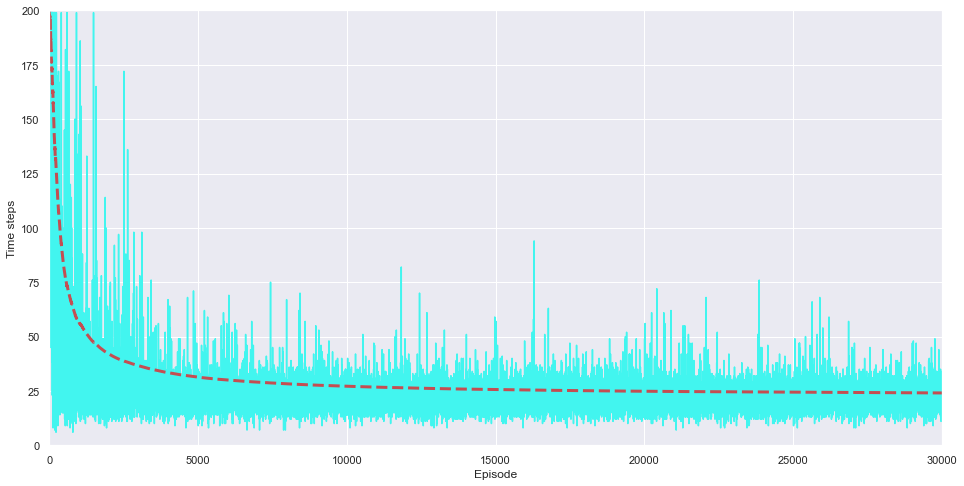

In [178]:
t.plot_timesteps()